# <span style="color : #91141c"> <u>Projet 6 - Analysez les ventes d'une librairies avec Python</u></span>

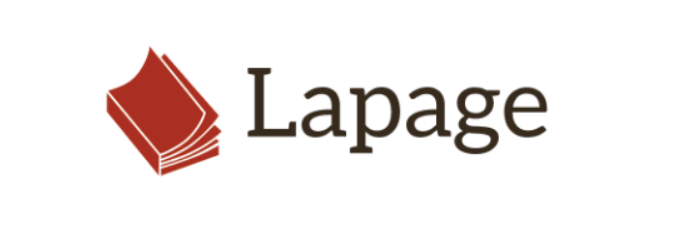

## <span style="color : #91141c"> <u>1 - Importation des librairies</u></span>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import normaltest
import scipy.stats as sps
from scipy.stats import f_oneway

## <span style="color : #91141c"> <u>2 - Importation des tables</u></span>

In [2]:
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')
transactions = pd.read_csv('transactions.csv')

In [3]:
customers.head(10)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
5,c_415,m,1993
6,c_285,f,1967
7,c_160,f,1978
8,c_6446,m,1971
9,c_6866,m,1993


In [4]:
products.head(10)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
5,0_1163,9.99,0
6,1_463,36.99,1
7,0_2157,34.99,0
8,0_1915,16.99,0
9,0_389,18.99,0


In [5]:
transactions.head(10)

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478
6,0_1475,2022-06-03 04:45:09.871601,s_218033,c_7782
7,0_2110,2021-06-26 14:48:55.311418,s_54122,c_7456
8,0_1156,2022-12-27 12:27:40.641366,s_318058,c_7363
9,1_299,2021-11-29 15:54:25.880121,s_126880,c_1847


## <span style="color : #91141c"> <u>3 - Nettoyage de données</u></span>

### <span style="color : #8c4f48"> <u>3.1 - Dataframe customers</u></span>

#### <span style="color : #8c4f48"> <u> 3.1.1 - Infos sur le dataframe</u></span>

In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


#### <span style="color : #8c4f48"> <u>3.1.2 - Comptabiliser les valeurs manquantes</u></span>

In [7]:
print(customers.isnull().sum())

client_id    0
sex          0
birth        0
dtype: int64


#### <span style="color : #8c4f48"> <u>3.1.3 - Vérifier l'unicité des clés primaires</u></span>

In [8]:
customers['client_id'].duplicated().sum()

0

###### Les clés primaires sont toutes uniques dans ce dataframe

### <span style="color : #da6033"> <u>3.2 - Dataframe products</u></span>

#### <span style="color : #da6033"> <u>3.2.1 - Infos sur le dataframe</u></span>

In [9]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


#### <span style="color : #da6033"> <u>3.2.2 - Comptabiliser les valeurs manquantes</u></span> 

In [10]:
print(products.isnull().sum())

id_prod    0
price      0
categ      0
dtype: int64


#### <span style="color : #da6033"> <u>3.2.3 - Vérifier l'unicité des clés primaires</u></span> 

In [11]:
products['id_prod'].duplicated().sum()

0

###### Les clés primaires sont toutes uniques dans ce dataframe

#### <span style="color : #da6033"> <u>3.2.4 - Description des prix</u></span> 

In [12]:
products['price'].describe()

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

###### Présence d'un prix qui semble aberrant : -1.00000

#### <span style="color : #da6033"> <u>3.2.5 Visualisation du prix qui semble aberrant afin de trouver son id_prod et de pouvoir éventuellement trouver le bon prix dans le dataframe transactions</u></span> 

In [13]:
products[products['price']<0]

,id_prod,price,categ
731,T_0,-1.0,0


### <span style="color : #dc143c"> <u>3.3 - Dataframe transactions</u></span> 

#### <span style="color : #dc143c"> <u>3.3.1 - Infos sur le dataframe</u></span> 

In [14]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


#### <span style="color : #dc143c"> <u>3.3.2 - Comptabiliser les valeurs manquantes </u></span> 

In [15]:
print(transactions.isnull().sum())

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


#### <span style="color : #dc143c"> <u>3.3.3 - Recherche du prix de l'id_prod "T_0"</u></span> 

In [16]:
transactions.loc[transactions['id_prod']=='T_0']

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


###### Cet id_prod s'avère être un test 

#### <span style="color : #dc143c"> <u>3.3.4 - Vérifier les doublons</u></span> 

In [17]:
transactions['date'].duplicated().sum()

161

### <span style="color : #8f1c2a"> <u>3.4 - Suppression de l'id_prod "T_0" de tous les dataframes</u></span> 

#### <span style="color : #8f1c2a"> <u>3.4.1 - Dataframe transactions</u></span> 

In [18]:
transactions.drop(transactions[(transactions['id_prod']=='T_0')].index, inplace=True)

###### Vérification

In [19]:
transactions.loc[transactions['id_prod']=='T_0']

,id_prod,date,session_id,client_id


#### <span style="color : #8f1c2a"> <u>3.4.2 - Dataframe customers</u></span> 

In [20]:
customers.drop(customers[(customers['client_id']=='ct_0')].index, inplace=True)
customers.drop(customers[(customers['client_id']=='ct_1')].index, inplace=True)

###### Vérification

In [21]:
customers.loc[customers['client_id']=='ct_0']

,client_id,sex,birth


In [22]:
customers.loc[customers['client_id']=='ct_1']

,client_id,sex,birth


#### <span style="color : #8f1c2a"> <u>3.4.2 - Dataframe products</u></span> 

In [23]:
products.drop(products[(products['id_prod']=='T_0')].index, inplace=True)

###### Vérification

In [24]:
products.loc[products['id_prod']=='T_0']

,id_prod,price,categ


### <span style="color : #f37778"> <u>3.5 - Nouvelle vérification des doublons dans le dataframe transactions </u></span> 

In [25]:
transactions['date'].duplicated().sum()

0

### <span style="color : #117372"> <u>3.6 - Recherche des valeurs aberrantes</u></span> 

#### <span style="color : #117372"> <u>3.6.1 - Représentation graphique des valeurs aberrantes par catégorie</u></span> 

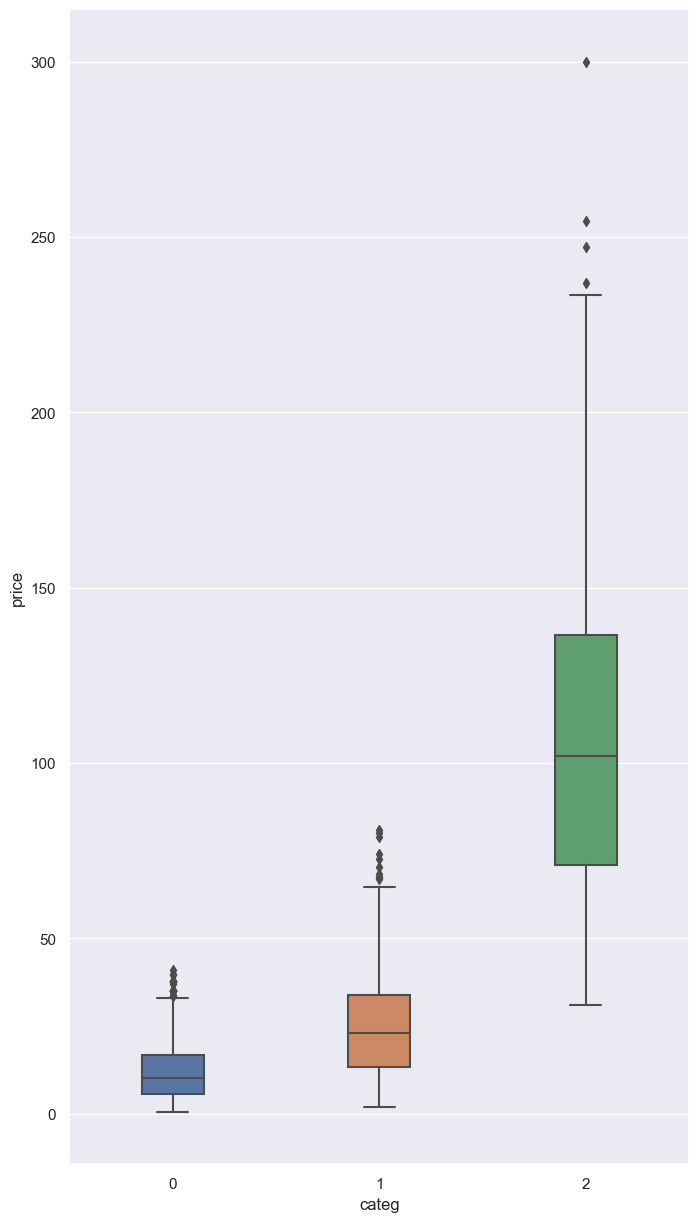

In [26]:
sns.set(style="darkgrid")
df = sns.load_dataset('iris')
figure=plt.figure(figsize=(8,15))
sns.boxplot(x=products["categ"], y=products["price"], width=0.3)
plt.show()

#### <span style="color : #117372"> <u>3.6.2 - Définir les valeurs aberrantes par catégorie</u></span> 

###### Catégorie 0

In [27]:
categ_0 = products.loc[products['categ']==0,:]
categ_0.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
4,0_1507,3.99,0
5,0_1163,9.99,0


In [28]:
q1_0 = categ_0["price"].quantile(0.25)
q3_0 = categ_0["price"].quantile(0.75)
iqr_0 = q3_0 - q1_0
valeur_abe_inf_0 = q1_0-1.5*iqr_0
print(round(valeur_abe_inf_0,2))
valeur_abe_sup_0 = q3_0+1.5*iqr_0
print(round(valeur_abe_sup_0,2))

-11.01
33.26


###### Catégorie 1 

In [29]:
categ_1 = products.loc[products['categ']==1,:]
categ_1.head()

,id_prod,price,categ
3,1_587,4.99,1
6,1_463,36.99,1
11,1_178,51.92,1
12,1_143,9.99,1
13,1_314,9.00,1


In [30]:
q1_1 = categ_1["price"].quantile(0.25)
q3_1 = categ_1["price"].quantile(0.75)
iqr_1 = q3_1 - q1_1
valeur_abe_inf_1 = q1_1-1.5*iqr_1
print(round(valeur_abe_inf_1,2))
valeur_abe_sup_1 = q3_1+1.5*iqr_1
print(round(valeur_abe_sup_1,2))

-17.51
64.89


###### Catégorie 2

In [31]:
categ_2 = products.loc[products['categ']==2,:]
categ_2.head()

,id_prod,price,categ
10,2_228,225.17,2
38,2_100,72.11,2
64,2_89,107.99,2
73,2_225,157.99,2
79,2_187,157.99,2


In [32]:
q1_2 = categ_2["price"].quantile(0.25)
q3_2 = categ_2["price"].quantile(0.75)
iqr_2 = q3_2 - q1_2
valeur_abe_inf_2 = q1_2-1.5*iqr_2
print(round(valeur_abe_inf_2,2))
valeur_abe_sup_2 = q3_2+1.5*iqr_2
print(round(valeur_abe_sup_2,2))

-27.13
234.73


#### <span style="color : #117372"> <u>3.6.3 - Affichage des valeurs aberrantes par catégorie</u></span> 

###### Catégorie 0

In [33]:
valeurs_abe_0 = (categ_0.loc[categ_0["price"]>=33.26])
valeurs_abe_0.sort_values(by=['price'],ascending=False)

,id_prod,price,categ
47,0_1629,40.99,0
2809,0_2147,39.99,0
1360,0_494,39.58,0
391,0_1239,37.99,0
569,0_197,37.99,0
2663,0_1581,37.99,0
1221,0_1544,37.91,0
2573,0_60,37.64,0
76,0_548,37.53,0
1294,0_920,37.46,0


In [34]:
valeurs_abe_0['price'].count()

22

###### Catégorie 1

In [35]:
valeurs_abe_1 = (categ_1.loc[categ_1["price"]>=64.89])
valeurs_abe_1.sort_values(by=['price'],ascending=False)

,id_prod,price,categ
824,1_13,80.99,1
879,1_679,79.99,1
808,1_10,78.83,1
2827,1_171,73.99,1
2962,1_608,72.75,1
204,1_496,70.51,1
1044,1_354,68.49,1
2324,1_514,67.66,1
1695,1_184,67.65,1
743,1_315,66.99,1


In [36]:
valeurs_abe_1['price'].count()

10

###### Catégorie 2

In [37]:
valeurs_abe_2 = (categ_2.loc[categ_2["price"]>=234.73])
valeurs_abe_2.sort_values(by=['price'],ascending=False)

,id_prod,price,categ
947,2_2,300.00,2
724,2_76,254.44,2
394,2_158,247.22,2
1436,2_167,236.99,2


In [38]:
valeurs_abe_2['price'].count()

4

###### Au total, 36 valeurs aberrantes sont recencées. Je les conserverais pour réaliser la suite de ce projet.

### <span style="color : #7327b8"> <u>3.7 - Joindre les 3 dataframes</u></span> 

#### <span style="color : #7327b8"> <u>3.7.1 - Jointure des dataframes products et transactions</u></span> 

In [39]:
prod_trans2 = pd.merge(products,transactions, how='outer', on='id_prod', indicator=True)
prod_trans2.head()

,id_prod,price,categ,date,session_id,client_id,_merge
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,both
1,0_1421,19.99,0.0,2022-11-19 03:42:20.707442,s_299590,c_8364,both
2,0_1421,19.99,0.0,2021-09-19 14:58:46.726179,s_92304,c_3544,both
3,0_1421,19.99,0.0,2023-01-11 16:04:24.367855,s_325369,c_1025,both
4,0_1421,19.99,0.0,2021-08-01 19:33:18.877168,s_70071,c_2298,both


In [40]:
prod_merge2=prod_trans2['_merge'].value_counts()
print(prod_merge2)

both          679111
right_only       221
left_only         21
Name: _merge, dtype: int64


###### 242 lignes non mergées (right_only et left_only)

#### Visualisation des lignes n'ayant pas mergé

In [41]:
right_only = prod_trans2.loc[prod_trans2['_merge']=='right_only']
right_only

,id_prod,price,categ,date,session_id,client_id,_merge
679132,0_2245,NaN,NaN,2022-09-23 07:22:38.636773,s_272266,c_4746,right_only
679133,0_2245,NaN,NaN,2022-07-23 09:24:14.133889,s_242482,c_6713,right_only
679134,0_2245,NaN,NaN,2022-12-03 03:26:35.696673,s_306338,c_5108,right_only
679135,0_2245,NaN,NaN,2021-08-16 11:33:25.481411,s_76493,c_1391,right_only
679136,0_2245,NaN,NaN,2022-07-16 05:53:01.627491,s_239078,c_7954,right_only
...,...,...,...,...,...,...,...
679348,0_2245,NaN,NaN,2021-08-25 09:06:03.504061,s_80395,c_131,right_only
679349,0_2245,NaN,NaN,2022-03-06 19:59:19.462288,s_175311,c_4167,right_only
679350,0_2245,NaN,NaN,2022-05-16 11:35:20.319501,s_209381,c_4453,right_only
679351,0_2245,NaN,NaN,2022-02-11 09:05:43.952857,s_163405,c_1098,right_only


In [42]:
right_only.nunique()

id_prod         1
price           0
categ           0
date          221
session_id    221
client_id     100
_merge          1
dtype: int64

###### Ici, il n'y a que les prix et la catégorie de l'id prod 0_2245 qui n'ont pas mergé. Grâce à l'id je peux en déduire qu'il s'agit de la catégorie 0 et je vais pouvoir lui attribuer le prix médian car mon l'écart pour cette catégorie est petit (cf. boîte à moustache).

In [43]:
left_only = prod_trans2.loc[prod_trans2['_merge']=='left_only']
left_only.head(23)

,id_prod,price,categ,date,session_id,client_id,_merge
39705,0_1016,35.06,0.0,NaN,NaN,NaN,left_only
62805,0_1780,1.67,0.0,NaN,NaN,NaN,left_only
162765,0_1062,20.08,0.0,NaN,NaN,NaN,left_only
177522,0_1119,2.99,0.0,NaN,NaN,NaN,left_only
181172,0_1014,1.15,0.0,NaN,NaN,NaN,left_only
188021,1_0,31.82,1.0,NaN,NaN,NaN,left_only
230468,0_1318,20.92,0.0,NaN,NaN,NaN,left_only
253465,0_1800,22.05,0.0,NaN,NaN,NaN,left_only
290409,0_1645,2.99,0.0,NaN,NaN,NaN,left_only
320861,0_322,2.99,0.0,NaN,NaN,NaN,left_only


###### Ici, les lignes non mergées possèdent uniquement un id_prod mais pas de client_id ni de session_id et de date de vente. Je peux donc en conclure qu'il s'agit de produit invendu et que je peux les supprimer car je ne les prendrais pas en compte dans le calcul du CA.

#### Supprimer les lignes n'ayant pas mergé ("left_only")

In [44]:
prod_trans2.drop(prod_trans2[prod_trans2['_merge'] == 'left_only'].index, inplace=True)

###### Vérification 

In [45]:
prod_merge3=prod_trans2['_merge'].value_counts()
print(prod_merge3)

both          679111
right_only       221
left_only          0
Name: _merge, dtype: int64


#### Trouver le prix median de la catégorie 0

In [46]:
categ_0.median(axis=0)

id_prod    1153.50
price        10.32
categ         0.00
dtype: float64

###### Le prix médian pour la catégorie 0 est de 10.32€

#### Remplacer le prix nul de l'id 0_2245 par le prix médian

In [47]:
prod_trans2['price'] = prod_trans2['price'].fillna(10.32)                            

In [48]:
prod_trans2.loc[prod_trans2['id_prod']=='0_2245']

,id_prod,price,categ,date,session_id,client_id,_merge
679132,0_2245,10.32,NaN,2022-09-23 07:22:38.636773,s_272266,c_4746,right_only
679133,0_2245,10.32,NaN,2022-07-23 09:24:14.133889,s_242482,c_6713,right_only
679134,0_2245,10.32,NaN,2022-12-03 03:26:35.696673,s_306338,c_5108,right_only
679135,0_2245,10.32,NaN,2021-08-16 11:33:25.481411,s_76493,c_1391,right_only
679136,0_2245,10.32,NaN,2022-07-16 05:53:01.627491,s_239078,c_7954,right_only
...,...,...,...,...,...,...,...
679348,0_2245,10.32,NaN,2021-08-25 09:06:03.504061,s_80395,c_131,right_only
679349,0_2245,10.32,NaN,2022-03-06 19:59:19.462288,s_175311,c_4167,right_only
679350,0_2245,10.32,NaN,2022-05-16 11:35:20.319501,s_209381,c_4453,right_only
679351,0_2245,10.32,NaN,2022-02-11 09:05:43.952857,s_163405,c_1098,right_only


#### Remplacer la valeur nulle de la catégorie de l'id 0_2245 par la catégorie 0

In [49]:
prod_trans2['categ'] = prod_trans2['categ'].fillna(0)         

In [50]:
prod_trans2.loc[prod_trans2['id_prod']=='0_2245']

,id_prod,price,categ,date,session_id,client_id,_merge
679132,0_2245,10.32,0.0,2022-09-23 07:22:38.636773,s_272266,c_4746,right_only
679133,0_2245,10.32,0.0,2022-07-23 09:24:14.133889,s_242482,c_6713,right_only
679134,0_2245,10.32,0.0,2022-12-03 03:26:35.696673,s_306338,c_5108,right_only
679135,0_2245,10.32,0.0,2021-08-16 11:33:25.481411,s_76493,c_1391,right_only
679136,0_2245,10.32,0.0,2022-07-16 05:53:01.627491,s_239078,c_7954,right_only
...,...,...,...,...,...,...,...
679348,0_2245,10.32,0.0,2021-08-25 09:06:03.504061,s_80395,c_131,right_only
679349,0_2245,10.32,0.0,2022-03-06 19:59:19.462288,s_175311,c_4167,right_only
679350,0_2245,10.32,0.0,2022-05-16 11:35:20.319501,s_209381,c_4453,right_only
679351,0_2245,10.32,0.0,2022-02-11 09:05:43.952857,s_163405,c_1098,right_only


In [51]:
prod_trans2['categ']=prod_trans2.categ.astype(int)

#### Mettre la série "categ" en intger pour enlever les virgule 

In [52]:
prod_trans2.loc[prod_trans2['id_prod']=='0_2245']

,id_prod,price,categ,date,session_id,client_id,_merge
679132,0_2245,10.32,0,2022-09-23 07:22:38.636773,s_272266,c_4746,right_only
679133,0_2245,10.32,0,2022-07-23 09:24:14.133889,s_242482,c_6713,right_only
679134,0_2245,10.32,0,2022-12-03 03:26:35.696673,s_306338,c_5108,right_only
679135,0_2245,10.32,0,2021-08-16 11:33:25.481411,s_76493,c_1391,right_only
679136,0_2245,10.32,0,2022-07-16 05:53:01.627491,s_239078,c_7954,right_only
...,...,...,...,...,...,...,...
679348,0_2245,10.32,0,2021-08-25 09:06:03.504061,s_80395,c_131,right_only
679349,0_2245,10.32,0,2022-03-06 19:59:19.462288,s_175311,c_4167,right_only
679350,0_2245,10.32,0,2022-05-16 11:35:20.319501,s_209381,c_4453,right_only
679351,0_2245,10.32,0,2022-02-11 09:05:43.952857,s_163405,c_1098,right_only


In [53]:
prod_trans2.drop(['_merge'], axis=1, inplace=True)

#### <span style="color : #7327b8"> <u>3.7.2 - Jointure des dataframes prod_trans2 et customers</u></span> 

In [54]:
data = pd.merge(prod_trans2,customers, how='outer', on='client_id', indicator=True)
data.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,_merge
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991,both
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991,both
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991,both
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991,both
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991,both


In [55]:
cust_merge=data['_merge'].value_counts()
print(cust_merge)

both          679332
right_only        21
left_only          0
Name: _merge, dtype: int64


###### 21 lignes non mergées (right_only)

#### Visualisation des lignes non mergées

In [56]:
data.loc[data['_merge']=='right_only']

,id_prod,price,categ,date,session_id,client_id,sex,birth,_merge
679332,NaN,NaN,NaN,NaN,NaN,c_8253,f,2001,right_only
679333,NaN,NaN,NaN,NaN,NaN,c_3789,f,1997,right_only
679334,NaN,NaN,NaN,NaN,NaN,c_4406,f,1998,right_only
679335,NaN,NaN,NaN,NaN,NaN,c_2706,f,1967,right_only
679336,NaN,NaN,NaN,NaN,NaN,c_3443,m,1959,right_only
679337,NaN,NaN,NaN,NaN,NaN,c_4447,m,1956,right_only
679338,NaN,NaN,NaN,NaN,NaN,c_3017,f,1992,right_only
679339,NaN,NaN,NaN,NaN,NaN,c_4086,f,1992,right_only
679340,NaN,NaN,NaN,NaN,NaN,c_6930,m,2004,right_only
679341,NaN,NaN,NaN,NaN,NaN,c_4358,m,1999,right_only


###### Les lignes non mergées possèdent seulement un client_id, le sexe et la date d'anniversaire. Je ne peux donc pas conserver ces lignes_là.

#### Conserver uniquement les lignes ayant mergé (both)

In [57]:
data=data.loc[data['_merge']=='both',:]
data.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,_merge
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991,both
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991,both
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991,both
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991,both
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991,both


###### Vérification et passer la série "categ" en integer

In [58]:
data_merge=data['_merge'].value_counts()
print(data_merge)

both          679332
left_only          0
right_only         0
Name: _merge, dtype: int64


In [59]:
data['categ']=data.categ.astype(int)

#### <span style="color : #7327b8"> <u>3.7.3 - Suppression de la colonne "_merge"</u></span> 

In [60]:
data.drop(['_merge'], axis=1, inplace=True)
data

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991
...,...,...,...,...,...,...,...,...
679327,2_163,68.99,2,2022-01-28 16:51:07.389515,s_156517,c_7739,m,1997
679328,2_101,63.99,2,2021-07-21 09:11:12.619736,s_65192,c_7089,m,2002
679329,2_101,63.99,2,2022-12-21 09:11:12.619736,s_315267,c_7089,m,2002
679330,2_101,63.99,2,2022-10-21 09:11:12.619736,s_285788,c_7089,m,2002


#### Vérifier qu'il n'y ait pas de valeurs nulles et des doublons

In [61]:
print(data.isnull().sum())

id_prod       0
price         0
categ         0
date          0
session_id    0
client_id     0
sex           0
birth         0
dtype: int64


In [62]:
data['date'].duplicated().sum()

0

#### Mettre les dates au format datetime et conserver uniquement la date sans l'heure 

In [63]:
data['date'] = pd.to_datetime(data['date']).dt.date
data.head(10)

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2022-02-20,s_168213,c_6389,f,1991
1,0_1421,19.99,0,2022-10-20,s_285450,c_6389,f,1991
2,0_2131,8.99,0,2021-10-09,s_102458,c_6389,f,1991
3,0_1635,16.99,0,2021-04-28,s_26841,c_6389,f,1991
4,0_166,1.83,0,2021-07-15,s_62585,c_6389,f,1991
5,0_166,1.83,0,2022-10-15,s_282822,c_6389,f,1991
6,1_279,27.99,1,2021-06-15,s_48812,c_6389,f,1991
7,0_1545,18.99,0,2023-02-10,s_339625,c_6389,f,1991
8,0_1545,18.99,0,2023-01-29,s_334043,c_6389,f,1991
9,0_1545,18.99,0,2021-07-10,s_60493,c_6389,f,1991


In [64]:
data['date'] = pd.to_datetime(data['date'])

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   price       679332 non-null  float64       
 2   categ       679332 non-null  int32         
 3   date        679332 non-null  datetime64[ns]
 4   session_id  679332 non-null  object        
 5   client_id   679332 non-null  object        
 6   sex         679332 non-null  object        
 7   birth       679332 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 44.1+ MB


#### Rajouter une colonne de période avec le mois et l'année

In [66]:
data["mois"] = data["date"].dt.to_period("M")
data.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois
0,0_1421,19.99,0,2022-02-20,s_168213,c_6389,f,1991,2022-02
1,0_1421,19.99,0,2022-10-20,s_285450,c_6389,f,1991,2022-10
2,0_2131,8.99,0,2021-10-09,s_102458,c_6389,f,1991,2021-10
3,0_1635,16.99,0,2021-04-28,s_26841,c_6389,f,1991,2021-04
4,0_166,1.83,0,2021-07-15,s_62585,c_6389,f,1991,2021-07


### <span style="color : #417619"> <u>3.8 - Recherche d'anomalies dans les chiffres d'affaires des trois années</u></span> 

In [67]:
analyseCA = data.groupby(['mois'])[['price']].sum().reset_index().copy()
analyseCA.head(13)

,mois,price
0,2021-03,482533.49
1,2021-04,476253.78
2,2021-05,493026.03
3,2021-06,484160.80
4,2021-07,482876.68
5,2021-08,482377.67
6,2021-09,507364.52
7,2021-10,320870.98
8,2021-11,516270.93
9,2021-12,525989.52


In [68]:
analyseCA['price'].min()

320870.98

In [69]:
analyseCA['price'].max()

535685.02

In [70]:
analyseCA['mois']=analyseCA['mois'].astype(str)

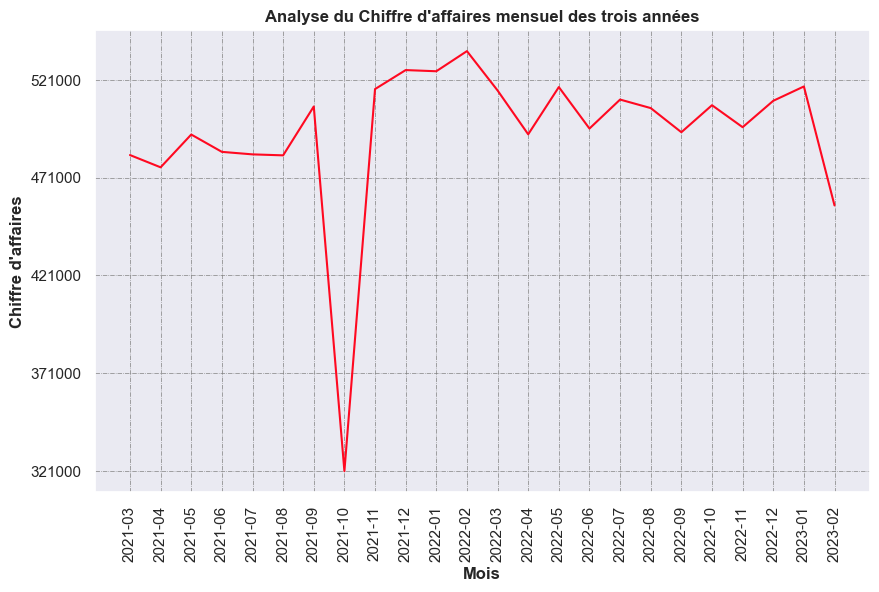

In [71]:
date = analyseCA["mois"]
value = analyseCA["price"]
fig, ax = plt.subplots(figsize=(10, 6))

plt.xticks(rotation=90)
plt.yticks(np.arange(321000,536000,50000))
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.set_xlabel('Mois', fontweight='bold')
ax.set_ylabel("Chiffre d'affaires",fontweight='bold')
plt.title("Analyse du Chiffre d'affaires mensuel des trois années",fontweight='bold')
ax.plot(date, value,color='#ff0921');

###### Présence d'une forte baisse du CA pour le mois d'Octobre 2021. Je vais approfondir cela. 

#### <span style="color : #417619"> <u>3.8.1 - Recherche d'une éventuelle anomalies sur le chiffre d'affaires du mois d'Octobre 2021 (analyse du CA par catégorie)</u></span> 

In [72]:
mask_oct = (data['date'] >= '2021-10-01') & (data['date'] <= '2021-10-31')

In [73]:
data_oct2021 = data.loc[mask_oct]
data_oct2021.head(10)

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois
2,0_2131,8.99,0,2021-10-09,s_102458,c_6389,f,1991,2021-10
16,0_2190,8.22,0,2021-10-01,s_98342,c_6389,f,1991,2021-10
17,0_1110,4.71,0,2021-10-22,s_108431,c_6389,f,1991,2021-10
29,0_1340,14.76,0,2021-10-11,s_103302,c_6389,f,1991,2021-10
47,0_1412,11.73,0,2021-10-01,s_98626,c_6389,f,1991,2021-10
58,0_1578,17.79,0,2021-10-29,s_112003,c_6389,f,1991,2021-10
92,0_1015,10.99,0,2021-10-13,s_104167,c_6389,f,1991,2021-10
103,0_1216,19.75,0,2021-10-26,s_110175,c_6389,f,1991,2021-10
109,0_1417,17.99,0,2021-10-11,s_103302,c_6389,f,1991,2021-10
111,0_2126,17.36,0,2021-10-01,s_98626,c_6389,f,1991,2021-10


In [74]:
categ = data_oct2021.groupby(['categ','date'])[['price']].sum().reset_index().copy()
categ.head(10)

,categ,date,price
0,0,2021-10-01,6950.50
1,0,2021-10-02,7141.01
2,0,2021-10-03,6786.57
3,0,2021-10-04,6554.24
4,0,2021-10-05,6357.91
5,0,2021-10-06,7546.58
6,0,2021-10-07,6404.01
7,0,2021-10-08,7069.53
8,0,2021-10-09,6808.69
9,0,2021-10-10,6490.98


In [75]:
categ['date'] = pd.to_datetime(categ['date']).dt.date

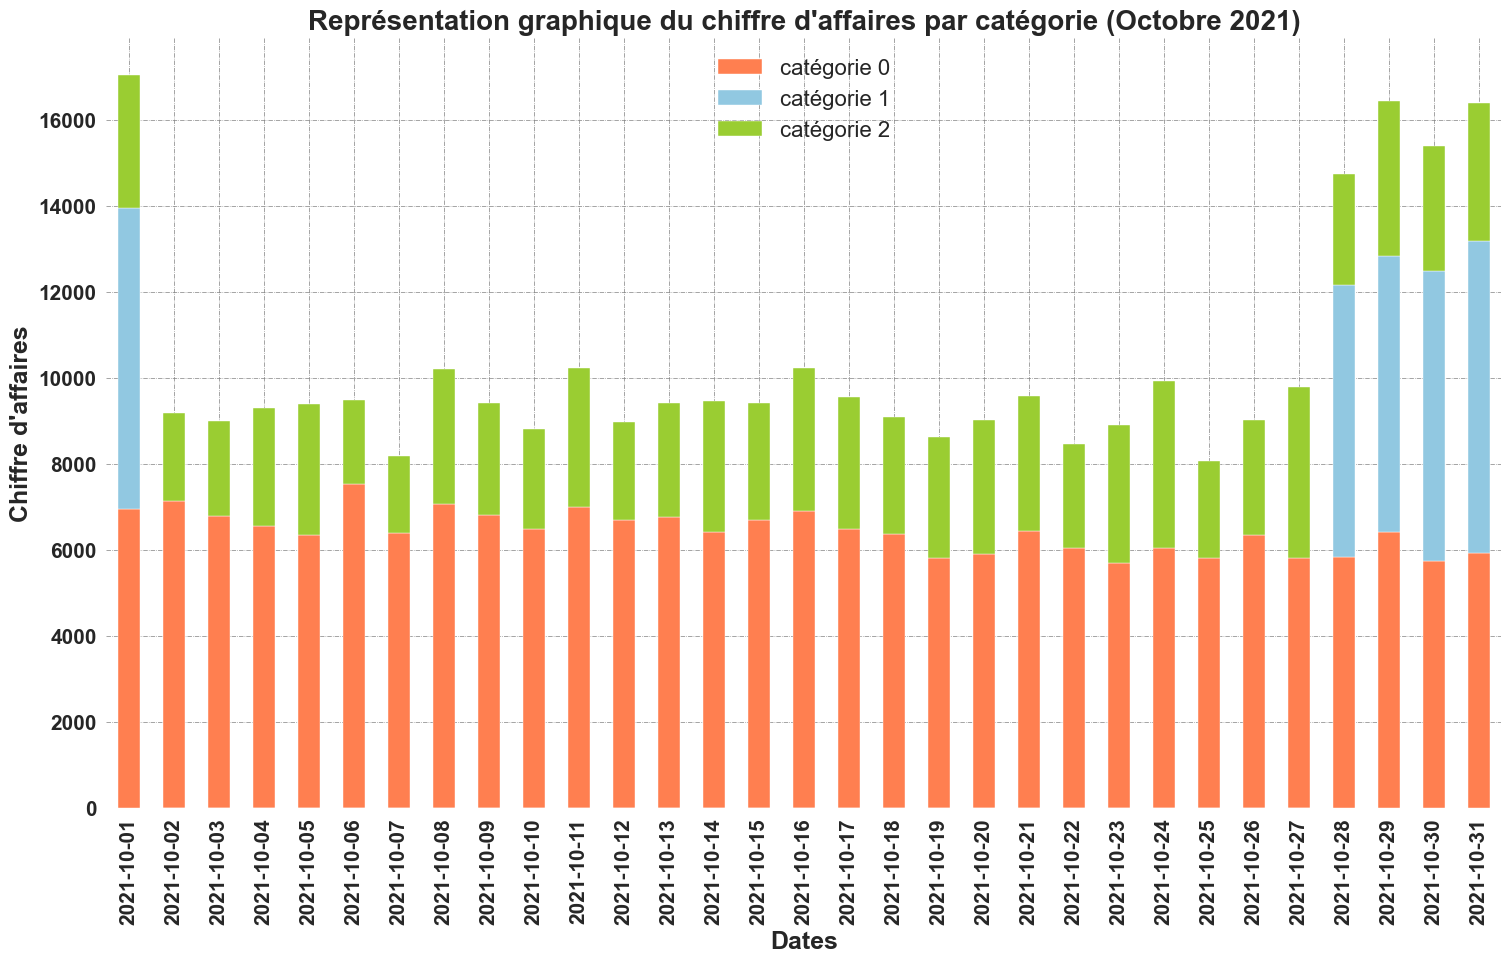

In [76]:
plt.style.use('seaborn')
fig,ax=plt.subplots(figsize=(18,10))
plt.box(False)
categ.groupby(['date','categ']).sum().unstack().plot(kind='bar',
        y = 'price', ax=ax, stacked=True, figsize=(18,10),
        color=['#ff7f50','#91c8e1','#9acd32'])
plt.legend(('catégorie 0','catégorie 1','catégorie 2'),loc='upper center',fontsize=16)

plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
ax.set_xlabel('Dates',fontweight='bold',fontsize=18)
ax.set_ylabel("Chiffre d'affaires",fontweight='bold',fontsize=18)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
plt.title("Représentation graphique du chiffre d'affaires par catégorie (Octobre 2021)",fontweight='bold',fontsize=20)
plt.show()

###### Durant le mois d'Octore 2021, quasiment aucun produits de la catégorie 1 ont été vendus. Cela provient probablement d'une erreur lors de la saisies des données. Cette information devrait être remontée pour remédier à cela mais ici ce n'est pas possible donc je vais supprimer ce mois de mon jeu de données afin d'avoir des résultats cohérents lors de mes analyses.

#### <span style="color : #417619"> <u>3.8.2 - Suppression du mois d'otcobre 2021 au sein des 3 dataframes</u></span> 

In [77]:
data.drop(data[(data['mois']=='2021-10')].index, inplace=True)
data.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois
0,0_1421,19.99,0,2022-02-20,s_168213,c_6389,f,1991,2022-02
1,0_1421,19.99,0,2022-10-20,s_285450,c_6389,f,1991,2022-10
3,0_1635,16.99,0,2021-04-28,s_26841,c_6389,f,1991,2021-04
4,0_166,1.83,0,2021-07-15,s_62585,c_6389,f,1991,2021-07
5,0_166,1.83,0,2022-10-15,s_282822,c_6389,f,1991,2022-10


###### Vérification

In [78]:
data.loc[data['mois']=='2021-10']

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois


## <span style="color : #91141c"> <u>4 - Demandes d'Antoine</u></span> 

### <span style="color : #fc00fc"> <u>4.1 - Indicateurs et graphiques autour du chiffre d'affaires</u></span> 

In [79]:
data['date'].min()

Timestamp('2021-03-01 00:00:00')

In [80]:
data['date'].max()

Timestamp('2023-02-28 00:00:00')

#### <span style="color : #fc00fc"> <u>4.1.1 - Chiffre d'affaires de l'année 2021</u></span> 

In [81]:
mask = (data['date'] >= '2021-03-01') & (data['date'] <= '2021-12-31')

In [82]:
data2021 = data.loc[mask]
data2021.head(10)

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois
3,0_1635,16.99,0,2021-04-28,s_26841,c_6389,f,1991,2021-04
4,0_166,1.83,0,2021-07-15,s_62585,c_6389,f,1991,2021-07
6,1_279,27.99,1,2021-06-15,s_48812,c_6389,f,1991,2021-06
9,0_1545,18.99,0,2021-07-10,s_60493,c_6389,f,1991,2021-07
10,0_1545,18.99,0,2021-07-29,s_68646,c_6389,f,1991,2021-07
15,0_2233,19.99,0,2021-05-30,s_41480,c_6389,f,1991,2021-05
21,0_1401,10.99,0,2021-07-06,s_58651,c_6389,f,1991,2021-07
22,0_2172,3.88,0,2021-04-28,s_26841,c_6389,f,1991,2021-04
24,1_694,19.87,1,2021-03-13,s_5706,c_6389,f,1991,2021-03
26,0_1267,3.99,0,2021-03-13,s_5706,c_6389,f,1991,2021-03


In [83]:
CA_2021 = data2021['price'].sum()
print("La chiffre d'affaires de l'année 2021 est de {:,}".format(CA_2021))

La chiffre d'affaires de l'année 2021 est de 4,450,853.42


#### <span style="color : #fc00fc"> <u>4.1.2 - Représentation graphique du chiffre d'affaires de l'année 2021</u></span> 

In [84]:
graph2021=data2021.groupby(['mois'])[['price']].sum().reset_index().copy()
graph2021.head(13)

,mois,price
0,2021-03,482533.49
1,2021-04,476253.78
2,2021-05,493026.03
3,2021-06,484160.80
4,2021-07,482876.68
5,2021-08,482377.67
6,2021-09,507364.52
7,2021-11,516270.93
8,2021-12,525989.52


In [85]:
graph2021['mois']=graph2021['mois'].astype(str)

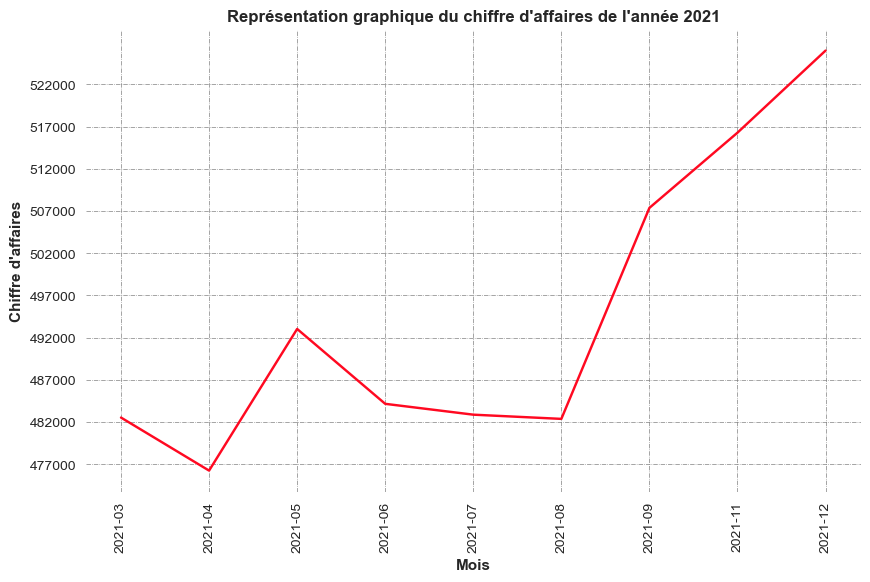

In [86]:
date = graph2021["mois"]
value = graph2021["price"]
fig, ax = plt.subplots(figsize=(10, 6))

plt.xticks(rotation=90)
plt.yticks(np.arange(477000,526000,5000))
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.set_xlabel('Mois', fontweight='bold')
ax.set_ylabel("Chiffre d'affaires",fontweight='bold')
plt.title("Représentation graphique du chiffre d'affaires de l'année 2021",fontweight='bold')
ax.set_facecolor('white')
ax.plot(date, value,color='#ff0921');

###### On constate une forte augmentation du CA à partir de Septembre 2021 qui peut s'expliquer par la rentrée scolaire qui nécessite d'acheter plus de livre à cette période là 

#### <span style="color : #fc00fc"> <u>4.1.3 - Chiffre d'affaires par catégorie (2021)</u></span> 

In [87]:
CA_categ0_2021 = round(np.sum(data2021.loc[data2021['categ']==0,'price']),2)
print("La chiffre d'affaires de la catégorie 0 pour l'année 2021 est de {:,}".format(CA_categ0_2021))

La chiffre d'affaires de la catégorie 0 pour l'année 2021 est de 1,684,595.22


In [88]:
CA_categ1_2021 = round(np.sum(data2021.loc[data2021['categ']==1,'price']),2)
print("La chiffre d'affaires de la catégorie 1 pour l'année 2021 est de {:,}".format(CA_categ1_2021))

La chiffre d'affaires de la catégorie 1 pour l'année 2021 est de 1,744,233.53


In [89]:
CA_categ2_2021 = round(np.sum(data2021.loc[data2021['categ']==2,'price']),2)
print("La chiffre d'affaires de la catégorie 2 pour l'année 2021 est de {:,}".format(CA_categ2_2021))

La chiffre d'affaires de la catégorie 2 pour l'année 2021 est de 1,022,024.67


#### Représentation graphique du CA par catégorie (2021)

In [90]:
graph_categ_2021 = data2021.groupby(['categ'])[['price']].sum().reset_index().copy()
graph_categ_2021.head(10)

,categ,price
0,0,1684595.22
1,1,1744233.53
2,2,1022024.67


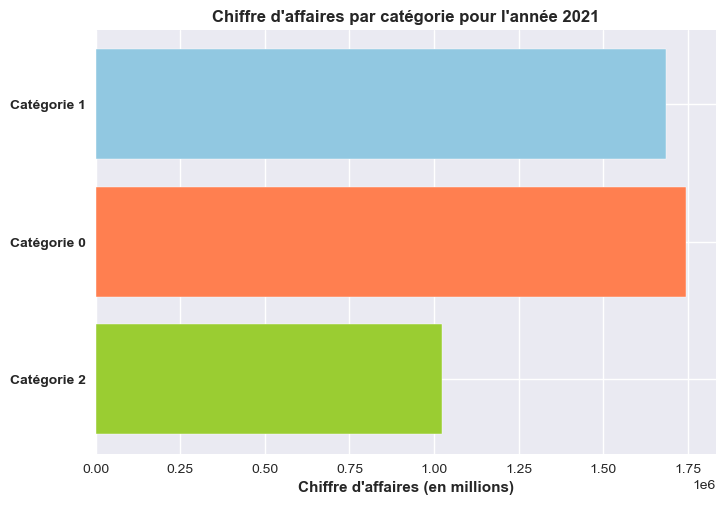

In [91]:
fig, ax = plt.subplots()

categ = ('Catégorie 1', 'Catégorie 0', 'Catégorie 2')
y_pos = np.arange(len(categ))
CA = graph_categ_2021['price']

ax.barh(y_pos, CA, color=('#91c8e1','#ff7f50','#9acd32'))
ax.set_yticks(y_pos, labels=categ,fontweight='bold')
ax.invert_yaxis()  
ax.set_xlabel("Chiffre d'affaires (en millions)",fontweight='bold')
ax.set_title("Chiffre d'affaires par catégorie pour l'année 2021",fontweight='bold')

plt.show()

#### <span style="color : #fc00fc"> <u>4.1.4 - Chiffre d'affaires par genre (2021)</u></span> 

In [92]:
CA_femme_2021 = round(np.sum(data2021.loc[data2021['sex']=='f','price']),2)
print("La chiffre d'affaires généré par les femmes pour l'année 2021 est de {:,}".format(CA_femme_2021))

La chiffre d'affaires généré par les femmes pour l'année 2021 est de 2,196,154.1


In [93]:
CA_homme_2021 = round(np.sum(data2021.loc[data2021['sex']=='m','price']),2)
print("La chiffre d'affaires généré par les hommes pour l'année 2021 est de {:,}".format(CA_homme_2021))

La chiffre d'affaires généré par les hommes pour l'année 2021 est de 2,254,699.32


#### Représentation graphique du CA par genre (2021)

In [94]:
graph_genre_2021 = data2021.groupby(['sex'])[['price']].sum().reset_index().copy()
graph_genre_2021.head(10)

,sex,price
0,f,2196154.10
1,m,2254699.32


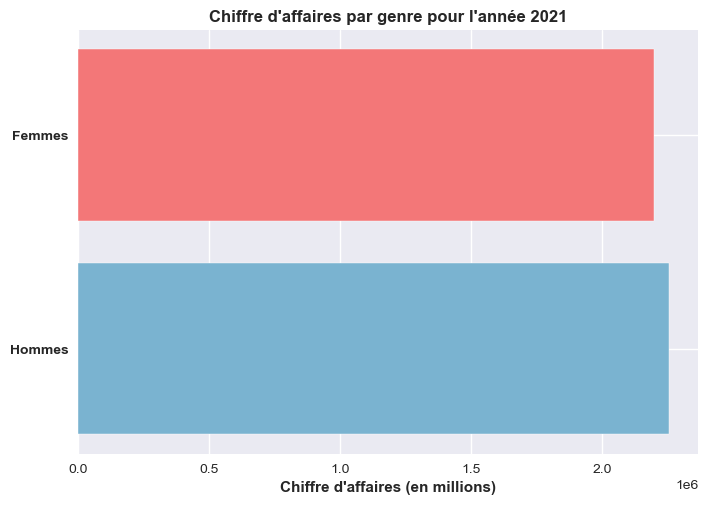

In [95]:
fig, ax = plt.subplots()

genre = ('Femmes', 'Hommes')
y_pos = np.arange(len(genre))
CA = graph_genre_2021['price']

ax.barh(y_pos, CA, color=('#f37778','#7ab3d0'))
ax.set_yticks(y_pos, labels=genre,fontweight='bold')
ax.invert_yaxis()  
ax.set_xlabel("Chiffre d'affaires (en millions)",fontweight='bold')
ax.set_title("Chiffre d'affaires par genre pour l'année 2021",fontweight='bold')

plt.show()

#### <span style="color : #fc00fc"> <u>4.1.5 - Chiffre d'affaires de l'année 2022</u></span> 

In [96]:
mask_2 = (data['date'] > '2022-01-01') & (data['date'] <= '2022-12-31')

In [97]:
data_2022 = data.loc[mask_2]
data_2022.head(10)

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois
0,0_1421,19.99,0,2022-02-20,s_168213,c_6389,f,1991,2022-02
1,0_1421,19.99,0,2022-10-20,s_285450,c_6389,f,1991,2022-10
5,0_166,1.83,0,2022-10-15,s_282822,c_6389,f,1991,2022-10
11,0_1545,18.99,0,2022-06-29,s_230983,c_6389,f,1991,2022-06
12,0_1545,18.99,0,2022-11-10,s_295594,c_6389,f,1991,2022-11
13,0_2233,19.99,0,2022-12-30,s_319318,c_6389,f,1991,2022-12
18,0_1401,10.99,0,2022-01-04,s_144881,c_6389,f,1991,2022-01
19,0_1401,10.99,0,2022-05-04,s_203558,c_6389,f,1991,2022-05
20,0_1401,10.99,0,2022-08-04,s_248294,c_6389,f,1991,2022-08
23,1_694,19.87,1,2022-05-13,s_207847,c_6389,f,1991,2022-05


In [98]:
CA_2022 = round(np.sum(data_2022['price']),2)
print("Le chiffre d'affaires pour l'année 2022 est de {:,}".format(CA_2022))

Le chiffre d'affaires pour l'année 2022 est de 6,092,813.6


#### <span style="color : #fc00fc"> <u>4.1.6 - Représentation graphique du chiffre d'affaires de l'année 2022</u></span> 

In [99]:
graph2022=data_2022.groupby(['mois'])[['price']].sum().reset_index().copy()
graph2022.head(13)

,mois,price
0,2022-01,508283.98
1,2022-02,535685.02
2,2022-03,515570.05
3,2022-04,493143.42
4,2022-05,517297.72
5,2022-06,496088.36
6,2022-07,510906.96
7,2022-08,506549.83
8,2022-09,494207.41
9,2022-10,508020.97


In [100]:
graph2022['mois']=graph2022['mois'].astype(str)

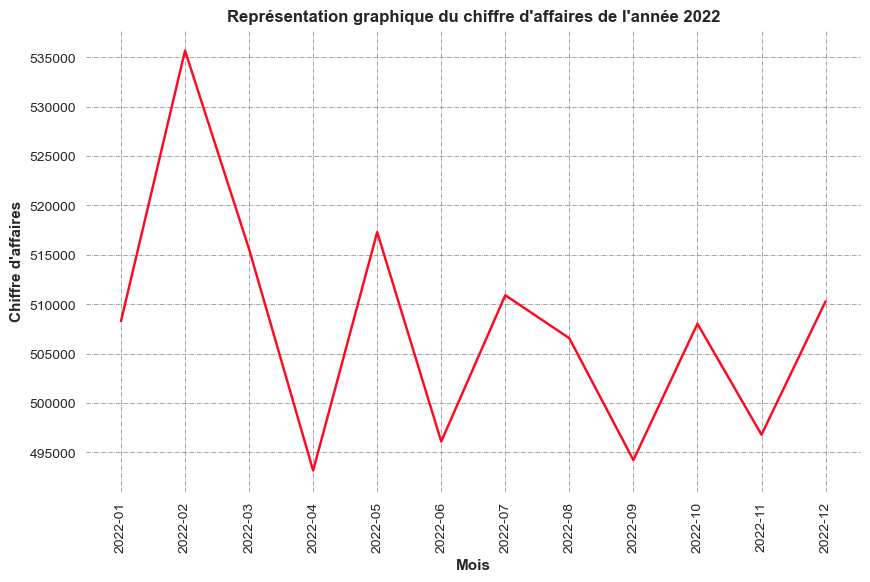

In [101]:
date = graph2022["mois"]
value = graph2022["price"]
fig, ax = plt.subplots(figsize=(10, 6))

plt.xticks(rotation=90)
plt.yticks(np.arange(490000,536000,5000))
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.set_xlabel('Mois', fontweight='bold')
ax.set_ylabel("Chiffre d'affaires",fontweight='bold')
plt.title("Représentation graphique du chiffre d'affaires de l'année 2022",fontweight='bold')
ax.set_facecolor('white')
ax.plot(date, value,color='#ff0921');

###### Le CA subit une forte baisse concernant les mois  d'Avril. 

#### Analyse du mois d'Avril 2022 pour expliquer la baisse du chiffre d'affaires

In [102]:
mask_avril = (data['date'] >= '2022-04-01') & (data['date'] <= '2022-04-30')

In [103]:
data_avril2022 = data.loc[mask_avril]
data_avril2022.head(10)

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois
57,0_1,10.99,0,2022-04-10,s_191981,c_6389,f,1991,2022-04
68,0_1474,9.88,0,2022-04-18,s_195963,c_6389,f,1991,2022-04
73,0_641,3.99,0,2022-04-19,s_196499,c_6389,f,1991,2022-04
142,0_2044,5.28,0,2022-04-13,s_193402,c_6389,f,1991,2022-04
143,1_350,20.83,1,2022-04-13,s_193402,c_6389,f,1991,2022-04
148,0_276,1.81,0,2022-04-19,s_196499,c_6389,f,1991,2022-04
150,0_1306,16.22,0,2022-04-11,s_192381,c_6389,f,1991,2022-04
173,0_1432,15.36,0,2022-04-11,s_192381,c_6389,f,1991,2022-04
218,0_2093,9.99,0,2022-04-11,s_192381,c_6389,f,1991,2022-04
237,0_1350,14.45,0,2022-04-11,s_192381,c_6389,f,1991,2022-04


In [104]:
categ_2022 = data_avril2022.groupby(['categ','date'])[['price']].sum().reset_index().copy()
categ_2022.head(10)

,categ,date,price
0,0,2022-04-01,4804.91
1,0,2022-04-02,4693.32
2,0,2022-04-03,7119.50
3,0,2022-04-04,6749.59
4,0,2022-04-05,5470.75
5,0,2022-04-06,5312.22
6,0,2022-04-07,5615.45
7,0,2022-04-08,6820.28
8,0,2022-04-09,4792.81
9,0,2022-04-10,6691.19


In [105]:
categ_2022['date'] = pd.to_datetime(categ_2022['date']).dt.date

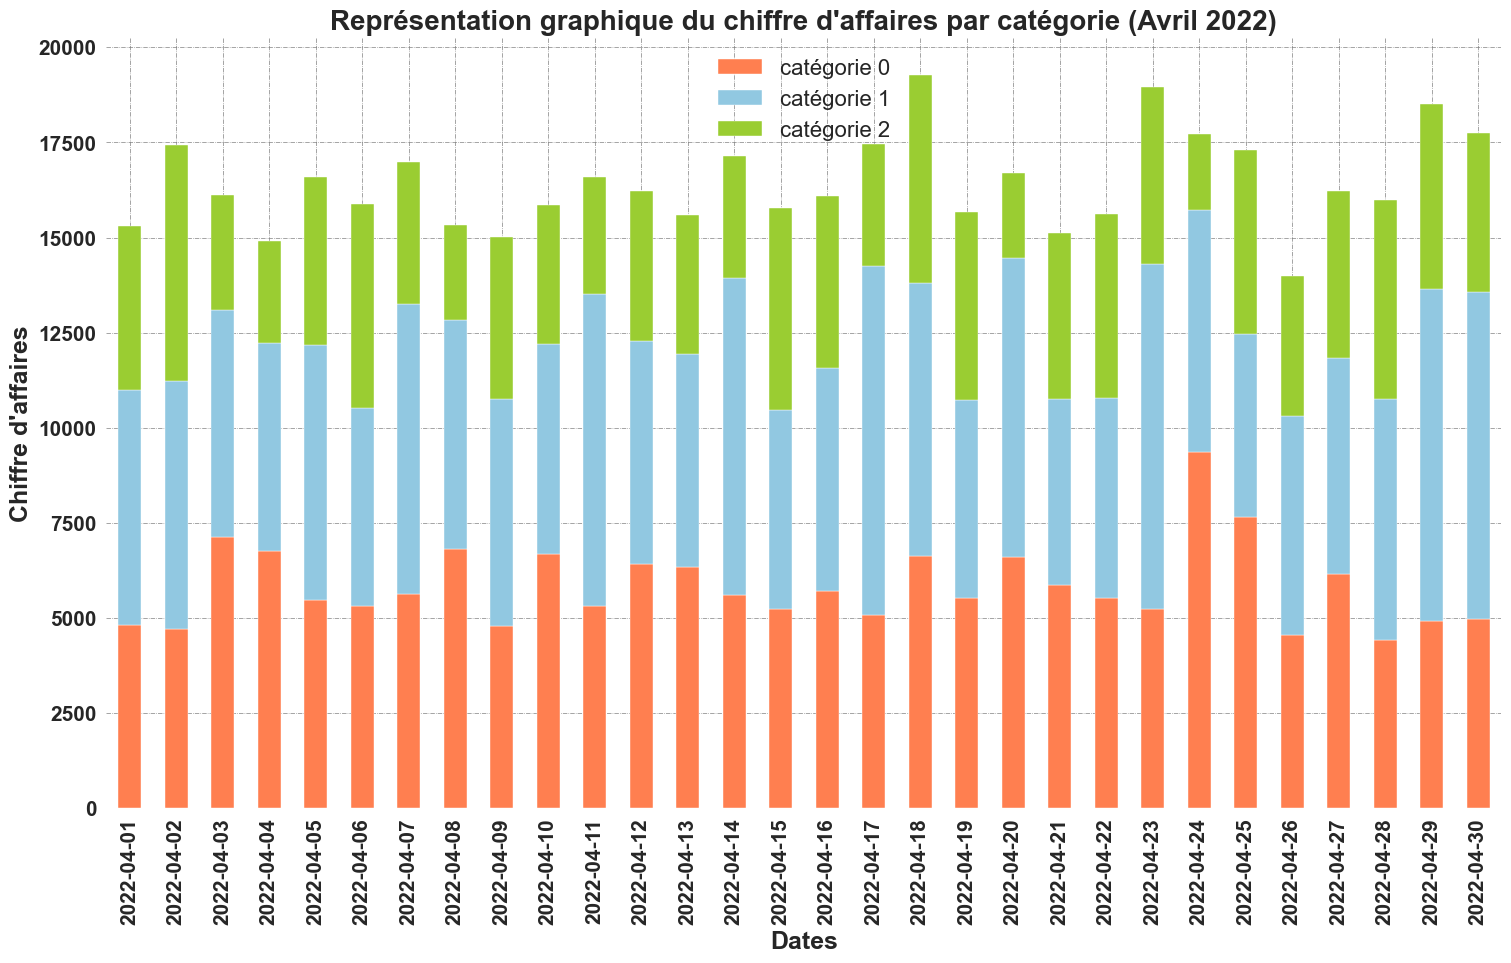

In [106]:
plt.style.use('seaborn')
fig,ax=plt.subplots(figsize=(18,10))
plt.box(False)
categ_2022.groupby(['date','categ']).sum().unstack().plot(kind='bar',
        y = 'price', ax=ax, stacked=True, figsize=(18,10),
        color=['#ff7f50','#91c8e1','#9acd32'])
plt.legend(('catégorie 0','catégorie 1','catégorie 2'),loc='upper center',fontsize=16)

plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
ax.set_xlabel('Dates',fontweight='bold',fontsize=18)
ax.set_ylabel("Chiffre d'affaires",fontweight='bold',fontsize=18)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
plt.title("Représentation graphique du chiffre d'affaires par catégorie (Avril 2022)",fontweight='bold',fontsize=20)
plt.show()

###### La baisse du chiffre d'affaires pour le mois d'Avril 2022 est lié à la baisse des ventes des livres de catégorie 2

#### <span style="color : #fc00fc"> <u>4.1.7 - Chiffre d'affaires par catégorie (2022)</u></span> 

In [107]:
CA_categ0_2022 = round(np.sum(data_2022.loc[data_2022['categ']==0,'price']),2)
print("La chiffre d'affaires de la catégorie 0 pour l'année 2022 est de {:,}".format(CA_categ0_2022))

La chiffre d'affaires de la catégorie 0 pour l'année 2022 est de 2,188,191.22


In [108]:
CA_categ1_2022 = round(np.sum(data_2022.loc[data_2022['categ']==1,'price']),2)
print("La chiffre d'affaires de la catégorie 1 pour l'année 2022 est de {:,}".format(CA_categ1_2022))

La chiffre d'affaires de la catégorie 1 pour l'année 2022 est de 2,476,190.78


In [109]:
CA_categ2_2022 = round(np.sum(data_2022.loc[data_2022['categ']==2,'price']),2)
print("La chiffre d'affaires de la catégorie 2 pour l'année 2022 est de {:,}".format(CA_categ2_2022))

La chiffre d'affaires de la catégorie 2 pour l'année 2022 est de 1,428,431.6


#### Représentation graphique du CA par catégorie (2022)

In [110]:
graph_categ_2022 = data_2022.groupby(['categ'])[['price']].sum().reset_index().copy()
graph_categ_2022.head(10)

,categ,price
0,0,2188191.22
1,1,2476190.78
2,2,1428431.60


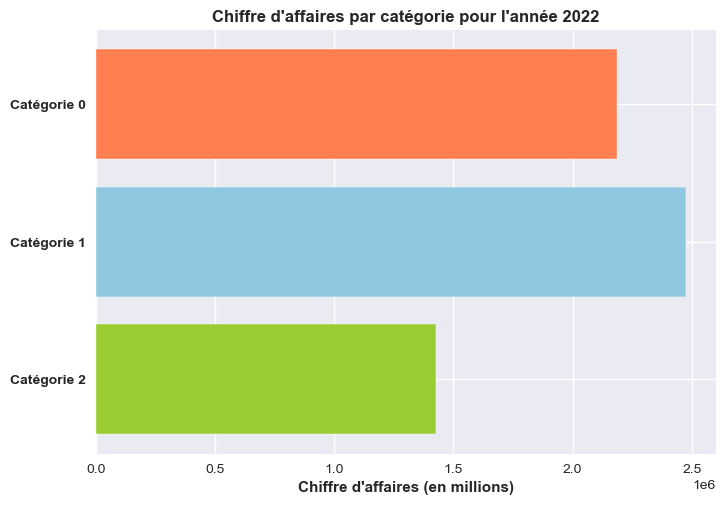

In [111]:
fig, ax = plt.subplots()

categ = ('Catégorie 0', 'Catégorie 1', 'Catégorie 2')
y_pos = np.arange(len(categ))
CA = graph_categ_2022['price']

ax.barh(y_pos, CA, color=('#ff7f50','#91c8e1','#9acd32'))
ax.set_yticks(y_pos, labels=categ,fontweight='bold')
ax.invert_yaxis()  
ax.set_xlabel("Chiffre d'affaires (en millions)",fontweight='bold')
ax.set_title("Chiffre d'affaires par catégorie pour l'année 2022",fontweight='bold')

plt.show()

#### <span style="color : #fc00fc"> <u>4.1.8 - Chiffre d'affaires par genre (2022)</u></span> 

In [112]:
CA_femme_2022 = round(np.sum(data_2022.loc[data_2022['sex']=='f','price']),2)
print("La chiffre d'affaires généré par les femmes pour l'année 2022 est de {:,}".format(CA_femme_2022))

La chiffre d'affaires généré par les femmes pour l'année 2022 est de 3,012,669.44


In [113]:
CA_homme_2022 = round(np.sum(data_2022.loc[data_2022['sex']=='m','price']),2)
print("La chiffre d'affaires généré par les hommes pour l'année 2022 est de {:,}".format(CA_homme_2022))

La chiffre d'affaires généré par les hommes pour l'année 2022 est de 3,080,144.16


#### Représentation graphique du CA par genre (2022)

In [114]:
graph_genre_2022 = data_2022.groupby(['sex'])[['price']].sum().reset_index().copy()
graph_genre_2022.head(10)

,sex,price
0,f,3012669.44
1,m,3080144.16


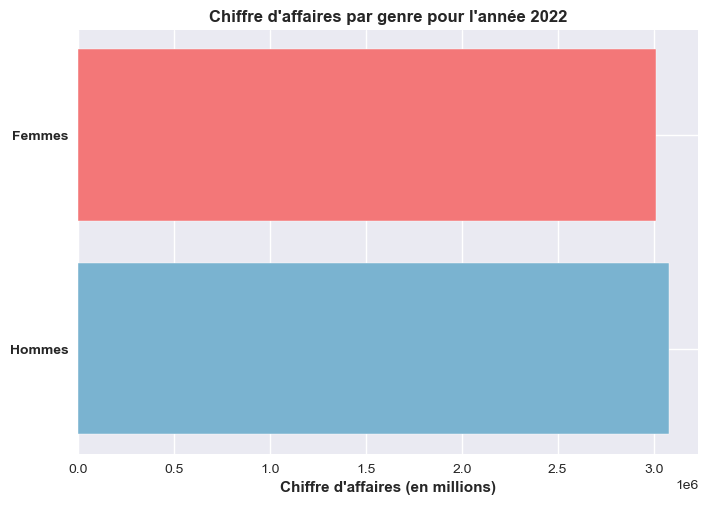

In [115]:
fig, ax = plt.subplots()

genre = ('Femmes', 'Hommes')
y_pos = np.arange(len(genre))
CA = graph_genre_2022['price']

ax.barh(y_pos, CA, color=('#f37778','#7ab3d0'))
ax.set_yticks(y_pos, labels=genre,fontweight='bold')
ax.invert_yaxis()  
ax.set_xlabel("Chiffre d'affaires (en millions)",fontweight='bold')
ax.set_title("Chiffre d'affaires par genre pour l'année 2022",fontweight='bold')

plt.show()

#### <span style="color : #fc00fc"> <u>4.1.9 - Chiffre d'affaires de l'année 2023</u></span> 

In [116]:
mask_3 = (data['date'] > '2023-01-01') & (data['date'] <= '2023-02-28')

In [117]:
data2023 = data.loc[mask_3]
data2023.head(10)

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois
7,0_1545,18.99,0,2023-02-10,s_339625,c_6389,f,1991,2023-02
8,0_1545,18.99,0,2023-01-29,s_334043,c_6389,f,1991,2023-01
14,0_2233,19.99,0,2023-01-30,s_334339,c_6389,f,1991,2023-01
60,0_1126,11.78,0,2023-01-04,s_322045,c_6389,f,1991,2023-01
69,0_1474,9.88,0,2023-02-18,s_343470,c_6389,f,1991,2023-02
74,0_641,3.99,0,2023-01-19,s_329363,c_6389,f,1991,2023-01
77,0_1566,9.04,0,2023-01-21,s_330323,c_6389,f,1991,2023-01
85,1_712,25.48,1,2023-01-08,s_324047,c_6389,f,1991,2023-01
89,0_1455,8.99,0,2023-02-05,s_337304,c_6389,f,1991,2023-02
100,0_1060,12.53,0,2023-02-05,s_337304,c_6389,f,1991,2023-02


In [118]:
CA_2023 = round(np.sum(data2023['price']),2)
print("Le chiffre d'affaires pour l'année 2023 est de {:,}".format(CA_2023))

Le chiffre d'affaires pour l'année 2023 est de 957,789.25


#### <span style="color : #fc00fc"> <u>4.1.10 - Chiffre d'affaires par catégorie (2023)</u></span> 

In [119]:
CA_categ0_2023 = round(np.sum(data2023.loc[data2023['categ']==0,'price']),2)
print("La chiffre d'affaires de la catégorie 0 pour l'année 2023 est de {:,}".format(CA_categ0_2023))

La chiffre d'affaires de la catégorie 0 pour l'année 2023 est de 337,611.57


In [120]:
CA_categ1_2023 = round(np.sum(data2023.loc[data2023['categ']==1,'price']),2)
print("La chiffre d'affaires de la catégorie 1 pour l'année 2023 est de {:,}".format(CA_categ1_2023))

La chiffre d'affaires de la catégorie 1 pour l'année 2023 est de 383,640.12


In [121]:
CA_categ2_2023 = round(np.sum(data2023.loc[data2023['categ']==2,'price']),2)
print("La chiffre d'affaires de la catégorie 2 pour l'année 2023 est de {:,}".format(CA_categ2_2023))

La chiffre d'affaires de la catégorie 2 pour l'année 2023 est de 236,537.56


#### Représentation graphique du CA par catégorie (2023)

In [122]:
graph_categ_2023 = data2023.groupby(['categ'])[['price']].sum().reset_index().copy()
graph_categ_2023.head(10)

,categ,price
0,0,337611.57
1,1,383640.12
2,2,236537.56


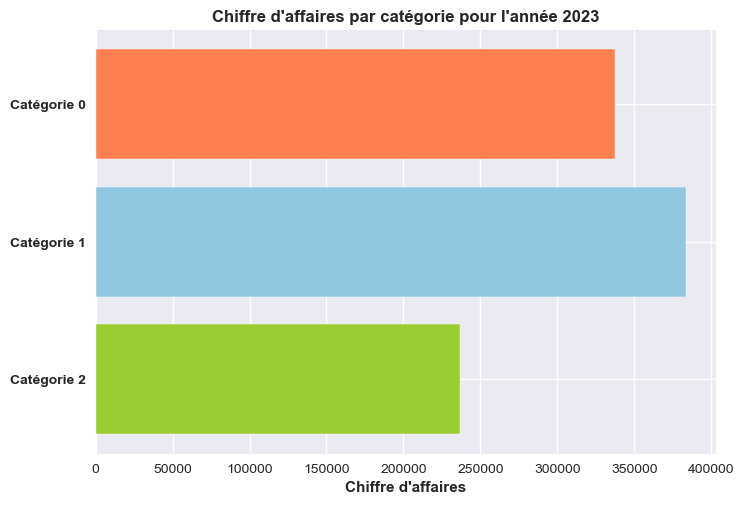

In [123]:
fig, ax = plt.subplots()

categ = ('Catégorie 0', 'Catégorie 1', 'Catégorie 2')
y_pos = np.arange(len(categ))
CA = graph_categ_2023['price']

ax.barh(y_pos, CA, color=('#ff7f50','#91c8e1','#9acd32'))
ax.set_yticks(y_pos, labels=categ,fontweight='bold')
ax.invert_yaxis()  
ax.set_xlabel("Chiffre d'affaires",fontweight='bold')
ax.set_title("Chiffre d'affaires par catégorie pour l'année 2023",fontweight='bold')

plt.show()

#### <span style="color : #fc00fc"> <u>4.1.11 - Chiffre d'affaires par genre (2023)</u></span> 

In [124]:
CA_femme_2023 = round(np.sum(data2023.loc[data2023['sex']=='f','price']),2)
print("La chiffre d'affaires généré par les femmes pour l'année 2023 est de {:,}".format(CA_femme_2023))

La chiffre d'affaires généré par les femmes pour l'année 2023 est de 479,815.84


In [125]:
CA_homme_2023 = round(np.sum(data2023.loc[data2023['sex']=='m','price']),2)
print("La chiffre d'affaires généré par les hommes pour l'année 2023 est de {:,}".format(CA_homme_2023))

La chiffre d'affaires généré par les hommes pour l'année 2023 est de 477,973.41


#### Représentation graphique du CA par genre (2023)

In [126]:
graph_genre_2023 = data2023.groupby(['sex'])[['price']].sum().reset_index().copy()
graph_genre_2023.head(10)

,sex,price
0,f,479815.84
1,m,477973.41


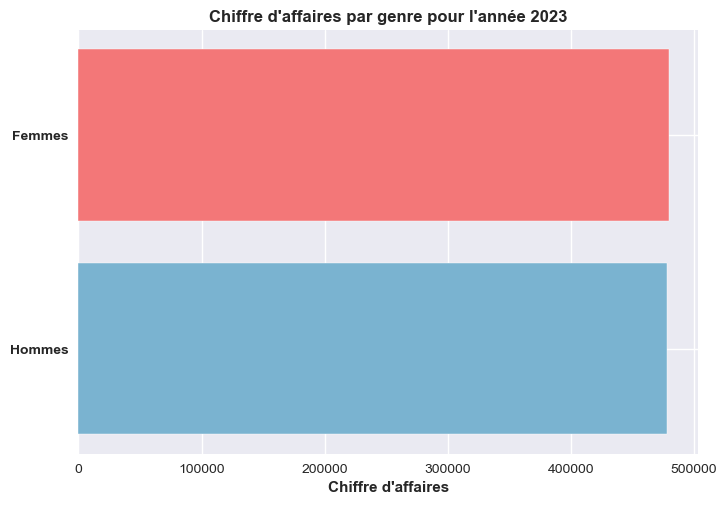

In [127]:
fig, ax = plt.subplots()

genre = ('Femmes', 'Hommes')
y_pos = np.arange(len(genre))
CA = graph_genre_2023['price']

ax.barh(y_pos, CA, color=('#f37778','#7ab3d0'))
ax.set_yticks(y_pos, labels=genre,fontweight='bold')
ax.invert_yaxis()  
ax.set_xlabel("Chiffre d'affaires",fontweight='bold')
ax.set_title("Chiffre d'affaires par genre pour l'année 2023",fontweight='bold')

plt.show()

#### <span style="color : #fc00fc"> <u>4.1.12 - Chiffre d'affaires total</u></span> 

In [128]:
CA_tot = round(CA_2021+CA_2022+CA_2023,2)
print("Le chiffre d'affaires total est de {:,}".format(CA_tot))

Le chiffre d'affaires total est de 11,501,456.27


#### <span style="color : #fc00fc"> <u>4.1.13 - Chiffre d'affaires total par catégorie</u></span>  

In [129]:
CA_categ0_tot = round(np.sum(data.loc[data['categ']==0,'price']),2)
print("La chiffre d'affaires total de la catégorie 0 est de {:,}".format(CA_categ0_tot))

La chiffre d'affaires total de la catégorie 0 est de 4,222,688.62


In [130]:
CA_categ1_tot = round(np.sum(data.loc[data['categ']==1,'price']),2)
print("La chiffre d'affaires total de la catégorie 1 est de {:,}".format(CA_categ1_tot))

La chiffre d'affaires total de la catégorie 1 est de 4,619,960.37


In [131]:
CA_categ2_tot = round(np.sum(data.loc[data['categ']==2,'price']),2)
print("La chiffre d'affaires total de la catégorie 2 est de {:,}".format(CA_categ2_tot))

La chiffre d'affaires total de la catégorie 2 est de 2,692,489.43


#### Représentation graphique du CA total par catégorie 

In [132]:
graph_categ_tot = data.groupby(['categ'])[['price']].sum().reset_index().copy()
graph_categ_tot.head(10)

,categ,price
0,0,4222688.62
1,1,4619960.37
2,2,2692489.43


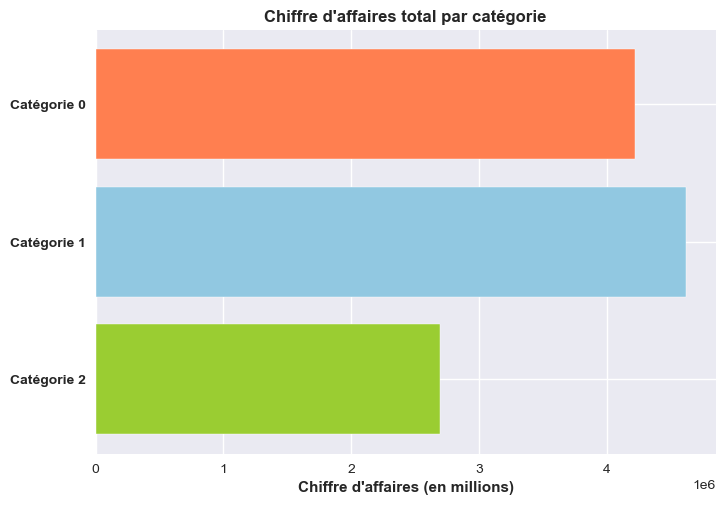

In [133]:
fig, ax = plt.subplots()

categ = ('Catégorie 0', 'Catégorie 1', 'Catégorie 2')
y_pos = np.arange(len(categ))
CA = graph_categ_tot['price']

ax.barh(y_pos, CA, color=('#ff7f50','#91c8e1','#9acd32'))
ax.set_yticks(y_pos, labels=categ,fontweight='bold')
ax.invert_yaxis()  
ax.set_xlabel("Chiffre d'affaires (en millions)",fontweight='bold')
ax.set_title("Chiffre d'affaires total par catégorie",fontweight='bold')

plt.show()

#### <span style="color : #fc00fc"> <u>4.1.14 - Chiffre d'affaires total par genre</u></span>   

In [134]:
CA_femme_tot = round(np.sum(data.loc[data['sex']=='f','price']),2)
print("La chiffre d'affaires total généré par les femmes est de {:,}".format(CA_femme_tot))

La chiffre d'affaires total généré par les femmes est de 5,705,550.5


In [135]:
CA_homme_tot = round(np.sum(data.loc[data['sex']=='m','price']),2)
print("La chiffre d'affaires total généré par les hommes est de {:,}".format(CA_homme_tot))

La chiffre d'affaires total généré par les hommes est de 5,829,587.92


#### Représentation graphique du CA total par genre

In [136]:
graph_genre_tot = data.groupby(['sex'])[['price']].sum().reset_index().copy()
graph_genre_tot.head(10)

,sex,price
0,f,5705550.50
1,m,5829587.92


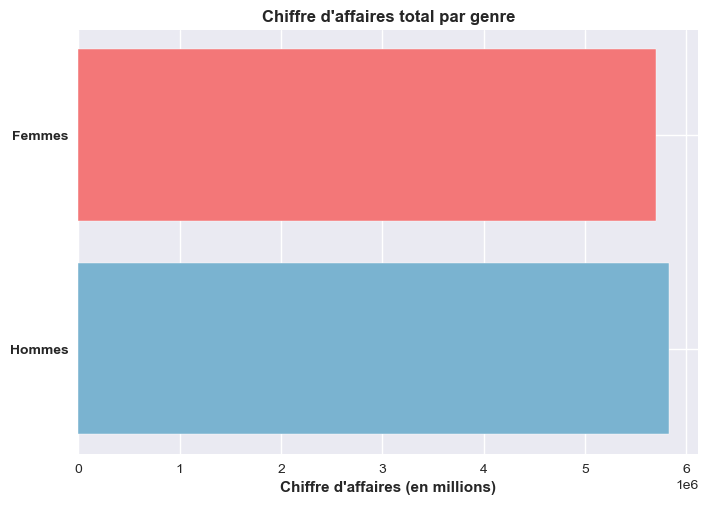

In [137]:
fig, ax = plt.subplots()

genre = ('Femmes', 'Hommes')
y_pos = np.arange(len(genre))
CA = graph_genre_tot['price']

ax.barh(y_pos, CA, color=('#f37778','#7ab3d0'))
ax.set_yticks(y_pos, labels=genre,fontweight='bold')
ax.invert_yaxis()  
ax.set_xlabel("Chiffre d'affaires (en millions)",fontweight='bold')
ax.set_title("Chiffre d'affaires total par genre",fontweight='bold')

plt.show()

###  <span style="color : #dd2000"> <u>4.2 - Évolution dans le temps et décomposition en moyenne mobile pour évaluer le tendance globale</u></span>   

#### <span style="color : #dd2000"> <u>4.2.1 - Représentation graphique de l'évolution dans le temps </u></span>   

In [138]:
evol_tot = data.groupby(['mois'])[['price']].sum().reset_index().copy()
evol_tot.head(13)

,mois,price
0,2021-03,482533.49
1,2021-04,476253.78
2,2021-05,493026.03
3,2021-06,484160.80
4,2021-07,482876.68
5,2021-08,482377.67
6,2021-09,507364.52
7,2021-11,516270.93
8,2021-12,525989.52
9,2022-01,525390.59


In [139]:
evol_tot['mois']=evol_tot['mois'].astype(str)

In [140]:
evol_tot['price'].max()

535685.02

In [141]:
evol_tot['price'].min()

456752.0

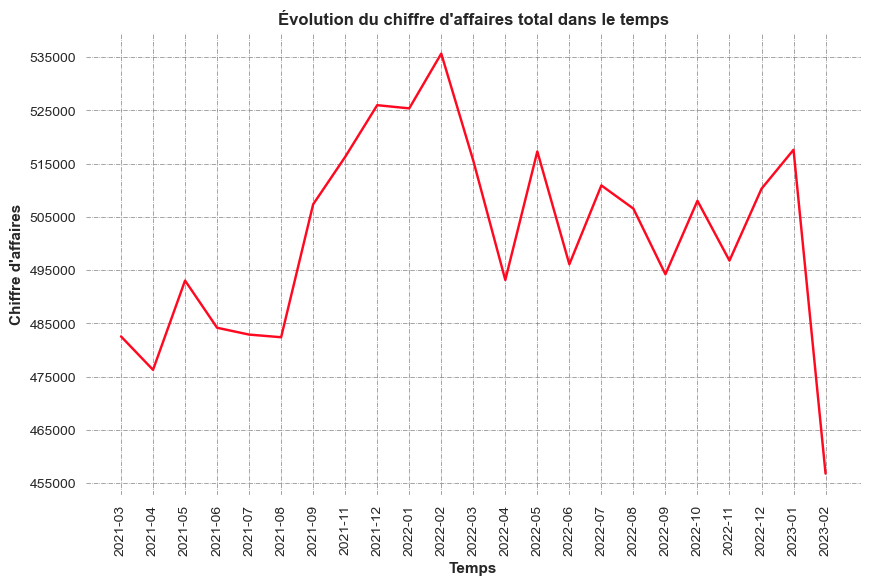

In [142]:
date = evol_tot["mois"]
value = evol_tot["price"]
fig, ax = plt.subplots(figsize=(10, 6))

plt.xticks(rotation=90)
plt.yticks(np.arange(455000,536000,10000))
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.set_xlabel('Temps', fontweight='bold')
ax.set_ylabel("Chiffre d'affaires",fontweight='bold')
plt.title("Évolution du chiffre d'affaires total dans le temps",fontweight='bold')
ax.set_facecolor('white')
ax.plot(date, value,color='#ff0921');

###### Le CA pour le mois de Février 2023 diminue fortement.

#### Analyse du mois de Février 2023 pour expliquer la baisse du chiffre d'affaires

In [143]:
mask_fevrier = (data['date'] >= '2023-02-01') & (data['date'] <= '2023-02-28')

In [144]:
data_fev2023 = data.loc[mask_fevrier]
data_fev2023.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois
7,0_1545,18.99,0,2023-02-10,s_339625,c_6389,f,1991,2023-02
69,0_1474,9.88,0,2023-02-18,s_343470,c_6389,f,1991,2023-02
89,0_1455,8.99,0,2023-02-05,s_337304,c_6389,f,1991,2023-02
100,0_1060,12.53,0,2023-02-05,s_337304,c_6389,f,1991,2023-02
121,0_1469,14.99,0,2023-02-22,s_345370,c_6389,f,1991,2023-02


In [145]:
categ_2023 = data_fev2023.groupby(['categ','date'])[['price']].sum().reset_index().copy()
categ_2023.head()

,categ,date,price
0,0,2023-02-01,5156.63
1,0,2023-02-02,4693.32
2,0,2023-02-03,4858.56
3,0,2023-02-04,5401.51
4,0,2023-02-05,5676.46


In [146]:
categ_2023['date'] = pd.to_datetime(categ_2023['date']).dt.date

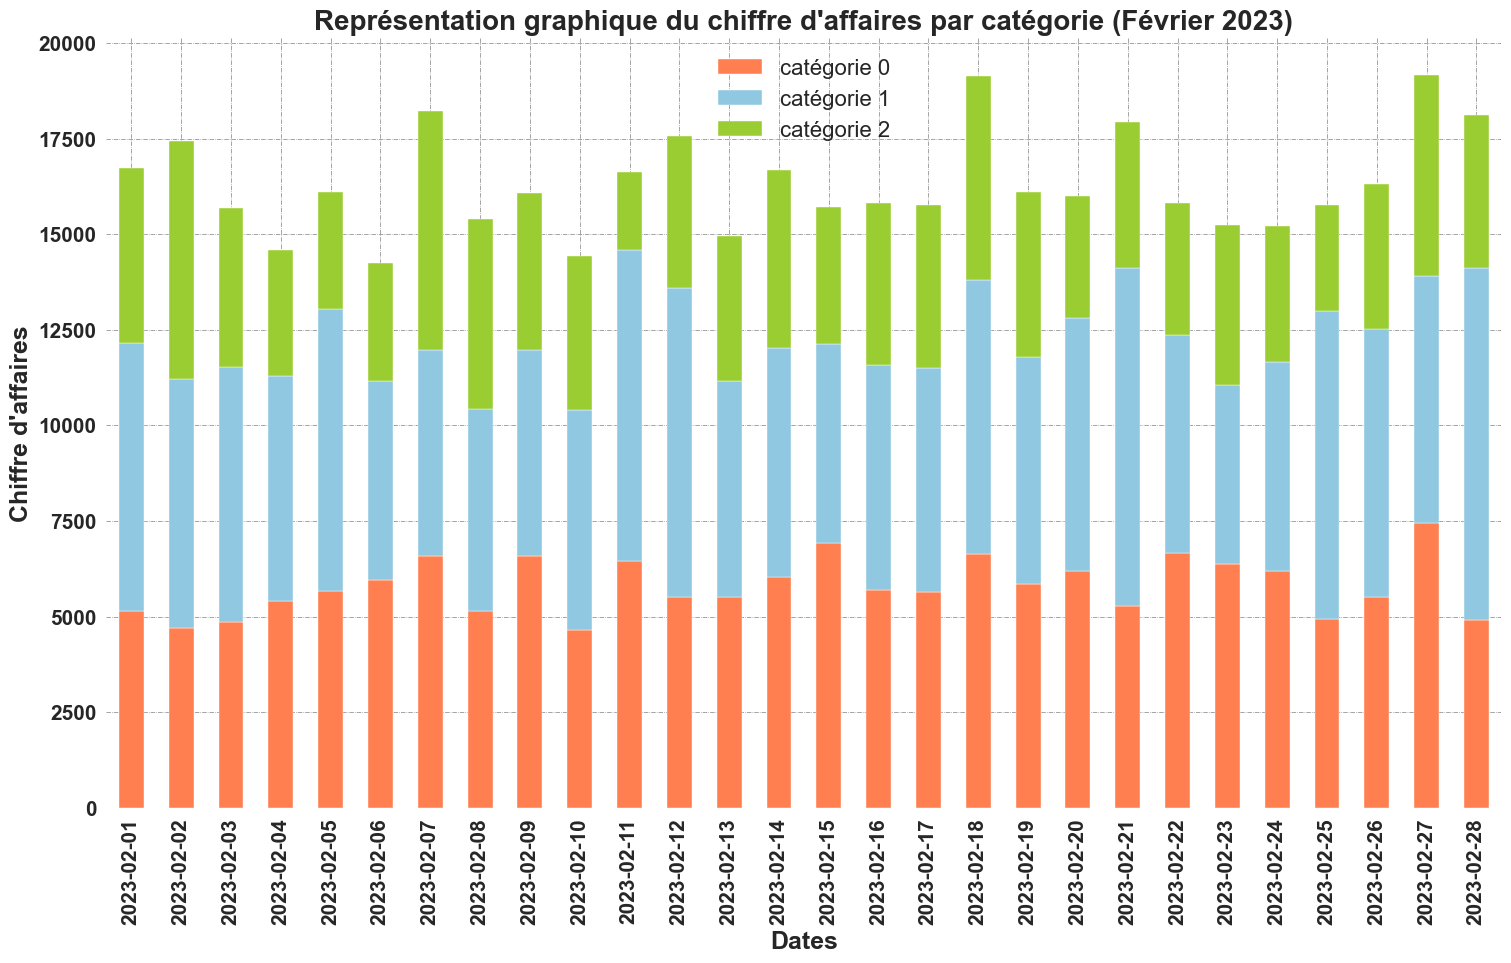

In [147]:
plt.style.use('seaborn')
fig,ax=plt.subplots(figsize=(18,10))
plt.box(False)
categ_2023.groupby(['date','categ']).sum().unstack().plot(kind='bar',
        y = 'price', ax=ax, stacked=True, figsize=(18,10),
        color=['#ff7f50','#91c8e1','#9acd32'])
plt.legend(('catégorie 0','catégorie 1','catégorie 2'),loc='upper center',fontsize=16)

plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
ax.set_xlabel('Dates',fontweight='bold',fontsize=18)
ax.set_ylabel("Chiffre d'affaires",fontweight='bold',fontsize=18)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
plt.title("Représentation graphique du chiffre d'affaires par catégorie (Février 2023)",fontweight='bold',fontsize=20)
plt.show()

###### La baisse du chiffre d'affaires pour le mois de Février 2023 est lié à la baisse des ventes des livres de catégorie 2

#### <span style="color : #dd2000"> <u>4.2.2 - Décomposition en moyenne mobile pour évaluer le tendance globale</u></span>  

In [148]:
data_MM = data.groupby(['date'])[['price']].sum().reset_index().copy()
data_MM.head(13)

,date,price
0,2021-03-01,16575.54
1,2021-03-02,15496.77
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37
5,2021-03-06,15785.28
6,2021-03-07,14770.52
7,2021-03-08,15679.53
8,2021-03-09,15710.51
9,2021-03-10,15496.87


In [149]:
data_MM['price'].min()

13792.21

In [150]:
data_MM['price'].max()

20498.0

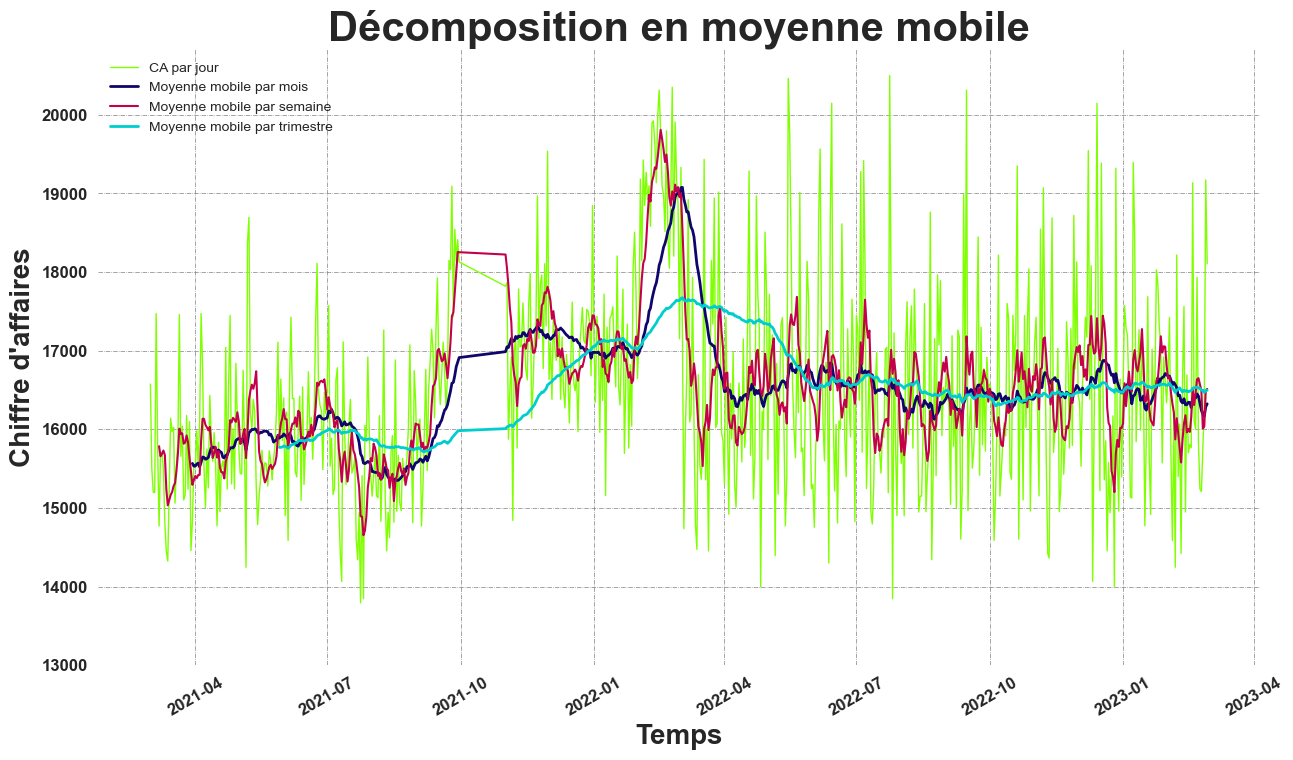

In [151]:
sma30 = data_MM["price"].rolling(window=30).mean()
sma7 = data_MM["price"].rolling(window=7).mean()
sma90 = data_MM["price"].rolling(window=90).mean()

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(data_MM['date'], data_MM["price"], color='#7fff00',label='CA par jour', linewidth=1)

ax.plot(data_MM['date'], sma30, color='#0f056b', label='Moyenne mobile par mois', linewidth=2)
ax.plot(data_MM['date'], sma7, color='#c5004b', label='Moyenne mobile par semaine', linewidth=1.5)
ax.plot(data_MM['date'], sma90, color='#00cdcd', label='Moyenne mobile par trimestre', linewidth=2)

ax.set_xlabel('Temps', fontweight='bold',fontsize=20)
ax.set_ylabel("Chiffre d'affaires",fontweight='bold',fontsize=20)
ax.set_title('Décomposition en moyenne mobile', fontweight='bold',fontsize=30)

plt.yticks(np.arange(13000, 21000, 1000), fontweight='bold',fontsize=12)
plt.xticks( fontweight='bold',fontsize=12)

ax.yaxis.grid(linewidth=0.5, color='grey', linestyle='-.')
ax.xaxis.grid(linewidth=0.5, color='grey', linestyle='-.')

plt.xticks(rotation=30)

ax.set_facecolor('white')

ax.legend(loc='upper left')

plt.show()

###### On peut constater un pic du CA entre Janvier 2022 et Avril 2022. Cependant, aucune tendance n'apparaît ici.

### <span style="color : #b14446"> <u>4.3 -  Zoom sur les références : tops et flops par catégorie</u></span>  

#### <span style="color : #b14446"> <u>4.3.1 - Séparation des clients professionnels et particuliers </u></span>  

###### Effectuer un top 10 pour identifier tous les clients pros

In [152]:
client = data.groupby('client_id')[['price']].sum().sort_values('price',ascending=False).reset_index().copy()
client.nlargest(10,'price')

,client_id,price
0,c_1609,312755.08
1,c_4958,282654.61
2,c_6714,149845.67
3,c_3454,111797.67
4,c_2899,5214.05
5,c_1570,5136.14
6,c_3263,5129.89
7,c_7319,5120.55
8,c_8026,4979.73
9,c_5263,4964.87


 #### Création d'un dataframe ne contenant que les clients professionnels

In [153]:
liste_pro = ['c_1609','c_4958','c_6714','c_3454']

In [154]:
data_pro = data.loc[data['client_id'].isin(liste_pro),:]
data_pro.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois
4177,0_1421,19.99,0,2021-12-25,s_140025,c_1609,m,1980,2021-12
4178,0_1421,19.99,0,2022-11-01,s_291178,c_1609,m,1980,2022-11
4179,0_1421,19.99,0,2022-05-13,s_208057,c_1609,m,1980,2022-05
4182,0_1421,19.99,0,2022-12-06,s_307813,c_1609,m,1980,2022-12
4183,0_1421,19.99,0,2021-08-17,s_76952,c_1609,m,1980,2021-08


#### Création d'un dataframe ne contenant que les clients particuliers

In [155]:
data_particulier = data[data['client_id'].isin(liste_pro)==False]
data_particulier.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois
0,0_1421,19.99,0,2022-02-20,s_168213,c_6389,f,1991,2022-02
1,0_1421,19.99,0,2022-10-20,s_285450,c_6389,f,1991,2022-10
3,0_1635,16.99,0,2021-04-28,s_26841,c_6389,f,1991,2021-04
4,0_166,1.83,0,2021-07-15,s_62585,c_6389,f,1991,2021-07
5,0_166,1.83,0,2022-10-15,s_282822,c_6389,f,1991,2022-10


#### <span style="color : #b14446"> <u>4.3.2 - Tops et flops de la catégorie 0</u></span>  

###### Particuliers

In [156]:
categ_0_p = data_particulier.loc[data_particulier['categ']==0,:]
categ_0_p.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois
0,0_1421,19.99,0,2022-02-20,s_168213,c_6389,f,1991,2022-02
1,0_1421,19.99,0,2022-10-20,s_285450,c_6389,f,1991,2022-10
3,0_1635,16.99,0,2021-04-28,s_26841,c_6389,f,1991,2021-04
4,0_166,1.83,0,2021-07-15,s_62585,c_6389,f,1991,2021-07
5,0_166,1.83,0,2022-10-15,s_282822,c_6389,f,1991,2022-10


In [157]:
top_0_p = categ_0_p.groupby('client_id')[['price']].sum().sort_values('price',ascending=False).reset_index().copy()
top_0_p.nlargest(3,'price')

,client_id,price
0,c_5953,3538.51
1,c_8026,3379.19
2,c_3263,3252.31


In [158]:
flop_0_p = categ_0_p.groupby('client_id')[['price']].sum().sort_values('price',ascending=False).reset_index().copy()
flop_0_p.nsmallest(3,'price')

,client_id,price
7809,c_1948,2.99
7810,c_5427,2.99
7811,c_7570,2.99


###### Professionnels

In [159]:
categ_0_pro = data_pro.loc[data_pro['categ']==0,:]
categ_0_pro.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois
4177,0_1421,19.99,0,2021-12-25,s_140025,c_1609,m,1980,2021-12
4178,0_1421,19.99,0,2022-11-01,s_291178,c_1609,m,1980,2022-11
4179,0_1421,19.99,0,2022-05-13,s_208057,c_1609,m,1980,2022-05
4182,0_1421,19.99,0,2022-12-06,s_307813,c_1609,m,1980,2022-12
4183,0_1421,19.99,0,2021-08-17,s_76952,c_1609,m,1980,2021-08


In [160]:
top_0_pro = categ_0_pro.groupby('client_id')[['price']].sum().sort_values('price',ascending=False).reset_index().copy()
top_0_pro.nlargest(3,'price')

,client_id,price
0,c_1609,203806.16
1,c_6714,54781.69
2,c_3454,27587.34


In [161]:
flop_0_pro = categ_0_pro.groupby('client_id')[['price']].sum().sort_values('price',ascending=False).reset_index().copy()
flop_0_pro.nsmallest(3,'price')

,client_id,price
3,c_4958,2.99
2,c_3454,27587.34
1,c_6714,54781.69


#### <span style="color : #b14446"> <u>4.3.3 - Tops et flops de la catégorie 1</u></span>  

###### Particuliers

In [162]:
categ_1_part = data_particulier.loc[data_particulier['categ']==1,:]
categ_1_part.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois
6,1_279,27.99,1,2021-06-15,s_48812,c_6389,f,1991,2021-06
23,1_694,19.87,1,2022-05-13,s_207847,c_6389,f,1991,2022-05
24,1_694,19.87,1,2021-03-13,s_5706,c_6389,f,1991,2021-03
25,1_694,19.87,1,2022-03-13,s_178479,c_6389,f,1991,2022-03
33,1_729,31.99,1,2022-12-15,s_312624,c_6389,f,1991,2022-12


In [163]:
top_1_part = categ_1_part.groupby('client_id')[['price']].sum().sort_values('price',ascending=False).reset_index().copy()
top_1_part.nlargest(3,'price')

,client_id,price
0,c_8526,3084.92
1,c_7198,2790.25
2,c_803,2745.86


In [164]:
flop_1_part = categ_1_part.groupby('client_id')[['price']].sum().sort_values('price',ascending=False).reset_index().copy()
flop_1_part.nsmallest(3,'price')

,client_id,price
8441,c_5527,4.05
8439,c_7389,10.17
8440,c_132,10.17


###### Professionnels

In [165]:
categ_1_pro = data_pro.loc[data_pro['categ']==1,:]
categ_1_pro.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois
4330,1_314,9.00,1,2022-01-14,s_149580,c_1609,m,1980,2022-01
4331,1_314,9.00,1,2022-10-14,s_282275,c_1609,m,1980,2022-10
4352,1_259,10.99,1,2022-07-21,s_241378,c_1609,m,1980,2022-07
4353,1_259,10.99,1,2023-01-21,s_329936,c_1609,m,1980,2023-01
4354,1_259,10.99,1,2022-12-23,s_316073,c_1609,m,1980,2022-12


In [166]:
top_1_pro = categ_1_pro.groupby('client_id')[['price']].sum().sort_values('price',ascending=False).reset_index().copy()
top_1_pro.nlargest(3,'price')

,client_id,price
0,c_1609,107447.71
1,c_3454,83123.61
2,c_6714,72679.77


In [167]:
flop_1_pro = categ_1_pro.groupby('client_id')[['price']].sum().sort_values('price',ascending=False).reset_index().copy()
flop_1_pro.nsmallest(3,'price')

,client_id,price
3,c_4958,39168.30
2,c_6714,72679.77
1,c_3454,83123.61


#### <span style="color : #b14446"> <u>4.3.4 - Tops et flops de la catégorie 2</u></span>  

###### Particuliers

In [168]:
categ_2_part = data_particulier.loc[data_particulier['categ']==2,:]
categ_2_part.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois
434,2_191,67.99,2,2021-12-26,s_140290,c_3544,f,1967,2021-12
600,2_159,145.99,2,2022-07-29,s_245285,c_1025,m,1984,2022-07
601,2_159,145.99,2,2022-08-23,s_257493,c_1025,m,1984,2022-08
1109,2_159,145.99,2,2022-05-29,s_215767,c_774,f,1959,2022-05
1192,2_39,57.99,2,2021-04-27,s_26664,c_2121,m,1983,2021-04


In [169]:
top_2_part = categ_2_part.groupby('client_id')[['price']].sum().sort_values('price',ascending=False).reset_index().copy()
top_2_part.nlargest(3,'price')

,client_id,price
0,c_2899,4409.66
1,c_2212,4279.54
2,c_6977,4197.09


In [170]:
flop_2_part = categ_1_part.groupby('client_id')[['price']].sum().sort_values('price',ascending=False).reset_index().copy()
flop_2_part.nsmallest(3,'price')

,client_id,price
8441,c_5527,4.05
8439,c_7389,10.17
8440,c_132,10.17


###### Professionnels

In [171]:
categ_2_pro = data_pro.loc[data_pro['categ']==2,:]
categ_2_pro.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois
4943,2_46,41.31,2,2021-07-24,s_66626,c_1609,m,1980,2021-07
15215,2_159,145.99,2,2021-09-07,s_86295,c_1609,m,1980,2021-09
15216,2_159,145.99,2,2021-06-27,s_54595,c_1609,m,1980,2021-06
15217,2_159,145.99,2,2021-11-26,s_125553,c_1609,m,1980,2021-11
15218,2_159,145.99,2,2021-08-08,s_72877,c_1609,m,1980,2021-08


In [172]:
top_2_pro = categ_2_pro.groupby('client_id')[['price']].sum().sort_values('price',ascending=False).reset_index().copy()
top_2_pro.nlargest(3,'price')

,client_id,price
0,c_4958,243483.32
1,c_6714,22384.21
2,c_1609,1501.21


In [173]:
flop_2_pro = categ_2_pro.groupby('client_id')[['price']].sum().sort_values('price',ascending=False).reset_index().copy()
flop_2_pro.nsmallest(3,'price')

,client_id,price
3,c_3454,1086.72
2,c_1609,1501.21
1,c_6714,22384.21


### <span style="color : #b58500"> <u>4.4 - Répartition du chiffre d'affaires entre les clients</u></span>  

#### <span style="color : #b58500"> <u>4.4.1 - Courbe de Lorenz</u></span>  

In [174]:
CL = data_particulier.groupby('client_id')[['price']].sum().reset_index().copy()
CL.head()

,client_id,price
0,c_1,550.19
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2209.92
4,c_1001,1720.08


In [175]:
CL_tot = data.groupby('client_id')[['price']].sum().reset_index().copy()
CL_tot.head()

,client_id,price
0,c_1,550.19
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2209.92
4,c_1001,1720.08


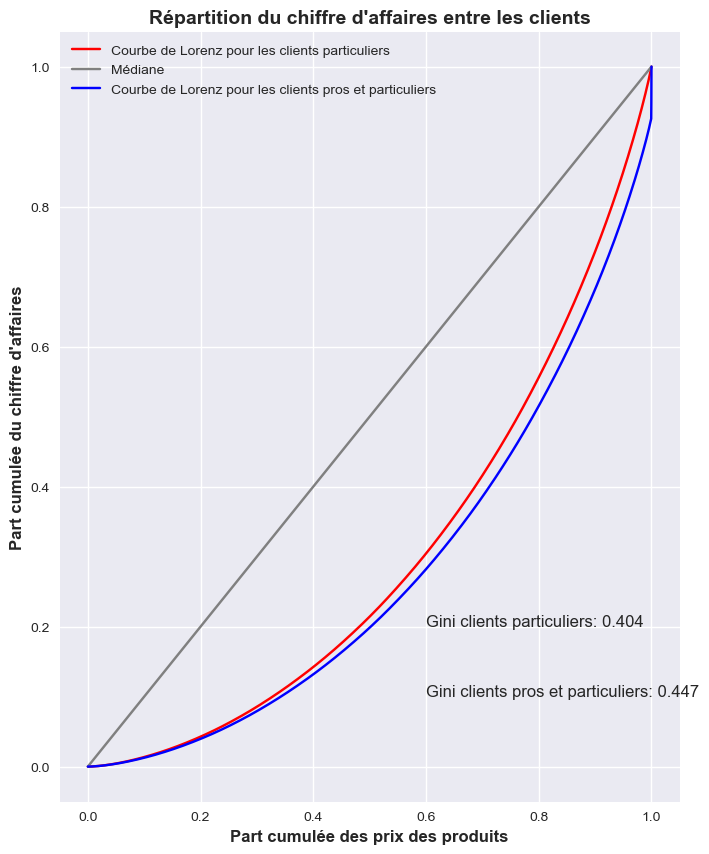

In [176]:
fig, ax = plt.subplots(figsize=(8, 10))
CL.sort_values(by='price', inplace=True)
CL_tot.sort_values(by='price', inplace=True)

prix_cumulatif = np.cumsum(CL['price'])
total_prix = prix_cumulatif.iloc[-1]
part_prix_cumule = prix_cumulatif / total_prix
compte_cumulatif = np.arange(1, len(CL) + 1)
part__compte_cumule = compte_cumulatif / len(CL)

prix_cumulatif_T = np.cumsum(CL_tot['price'])
total_prix_T = prix_cumulatif_T.iloc[-1]
part_prix_cumule_T = prix_cumulatif_T / total_prix_T
compte_cumulatif_T = np.arange(1, len(CL_tot) + 1)
part__compte_cumule_T = compte_cumulatif_T / len(CL_tot)

plt.plot(part__compte_cumule, part_prix_cumule, label='Courbe de Lorenz pour les clients particuliers', color='red')
plt.plot([0, 1], [0, 1], color='gray', linestyle='-', label='Médiane')
plt.plot(part__compte_cumule_T, part_prix_cumule_T, label='Courbe de Lorenz pour les clients pros et particuliers', color='blue')




plt.xlabel('Part cumulée des prix des produits', fontweight='bold',fontsize=12)
plt.ylabel("Part cumulée du chiffre d'affaires", fontweight='bold',fontsize=12)
plt.title("Répartition du chiffre d'affaires entre les clients", fontweight='bold',fontsize=14)
plt.legend()
plt.text(0.6, 0.2, "Gini clients particuliers: {:.3f}".format((np.sum(np.abs(np.subtract(part_prix_cumule, part__compte_cumule))) * 2) / len(CL)))
plt.text(0.6, 0.1, "Gini clients pros et particuliers: {:.3f}".format((np.sum(np.abs(np.subtract(part_prix_cumule_T, part__compte_cumule_T))) * 2) / len(CL_tot)))
plt.show()

###### Compte tenu de l'indice de Gini, la répartition du chiffre d'affaires entre les clients présente un faible niveau d'inégalité.

###### L'indice de Gini est un indicateur synthétique permettant de rendre compte du niveau d'inégalité pour une variable et sur une population donnée. Il varie entre 0 (égalité parfaite) et 1 (inégalité extrême).

## <span style="color : #91141c"> <u>5 - Demandes de Julie</u></span>  

### <span style="color : #f3593e"> <u>5.1 - Lien entre le genre d'un client et les catégories des livres achetés</u></span>  

###### Comparaison de 2 variables qualitatives (hommes et femmes) donc je fais un test de khi-2

#### <span style="color : #f3593e"> <u>5.1.1 - Réalisation d'un tableau de contingence pour effectuer le test du khi-2</u></span>

In [177]:
data_khi2 = pd.crosstab(data_particulier.sex,data_particulier.categ)
data_khi2

categ,0,1,2
sex,,,
f,192025,110550,16429
m,178044,100227,15351


#### <span style="color : #f3593e"> <u>5.1.2 - Effectuer le test de khi-2</u></span>

###### H0 : Les 2 variables sont indépendantes (si p-value > 0,05)
###### H1 :  Les 2 variables sont dépendantes (si p-value < 0,05)

In [178]:
chi2_contingency(pd.crosstab(data_particulier.sex,data_particulier.categ))

(18.75788251563821,
 8.448460261159054e-05,
 2,
 array([[192700.75262232, 109754.90120889,  16548.34616879],
        [177368.24737768, 101022.09879111,  15231.65383121]]))

###### p-value = 0.00008448 < 0.05

###### Les variables sont donc dépendantes et il y a alors un lien entre le genre d'un client et les catégories de livres achetés.

#### <span style="color : #f3593e"> <u>5.1.3 - Intervalle de confiance</u></span>

In [179]:
intervalle_confiance = data_khi2.apply(lambda x: stats.norm.interval(0.95, loc=x.mean(), scale=x.std()/np.sqrt(len(x))))

print("Intervalle de confiance à 95% pour chaque catégorie : ")
print(intervalle_confiance)

Intervalle de confiance à 95% pour chaque catégorie : 
categ              0              1             2
sex                                              
f      171333.371766   95272.145894  14833.579412
m      198735.628234  115504.854106  16946.420588


### <span style="color : #74a800"> <u>5.2 - Lien entre l'âge des clients et le montant total des achats</u></span>

#### Ajout de la colonne âge sur le dataframe data_particulier

In [180]:
data_particulier = data_particulier.assign(age = 2023 - data_particulier['birth'])
data_particulier.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois,age
0,0_1421,19.99,0,2022-02-20,s_168213,c_6389,f,1991,2022-02,32
1,0_1421,19.99,0,2022-10-20,s_285450,c_6389,f,1991,2022-10,32
3,0_1635,16.99,0,2021-04-28,s_26841,c_6389,f,1991,2021-04,32
4,0_166,1.83,0,2021-07-15,s_62585,c_6389,f,1991,2021-07,32
5,0_166,1.83,0,2022-10-15,s_282822,c_6389,f,1991,2022-10,32


#### <span style="color : #74a800"> <u>5.2.1 - Regrouper les achats par âge</u></span>

In [181]:
data_achat = data_particulier.groupby('age')[['price']].sum().reset_index().copy()
data_achat.head()

,age,price
0,19,591414.23
1,20,172831.75
2,21,178798.15
3,22,174347.66
4,23,160575.85


###### L'âge et le montant total des achats sont des variables continues donc je vais tester la normalité de celles_ci afin de définir le test le plus adapté.

In [182]:
sps.normaltest(data_achat['age'])

NormaltestResult(statistic=23.33269279340759, pvalue=8.577685837925247e-06)

###### p-value = 0.000008577 < 0,05. La variable ne suit pas une loi normale

In [183]:
sps.normaltest(data_achat['price'])

NormaltestResult(statistic=16.964470709305107, pvalue=0.00020711520892832493)

###### p-value = 0.0002 < 0,05. La variable ne suit pas une loi normale

###### Effectuer un test non paramétrique 

#### Test de spearman 

In [184]:
correl, p_val = stats.spearmanr(data_achat['age'], data_achat['price'])


print("Coefficient de corrélation :", correl)
print("p-value :", p_val)

Coefficient de corrélation : -0.8740396445659603
p-value : 6.668764227215193e-25


###### Le coefficient de corrélation est très proche de 1 donc il y a une forte association entre l'âge des clients et le montant total des achats.

###### p-value = 6.668e-25 < 0.05. Les variables sont donc dépendantes et il y a alors un lien entre l'âge des clients et le montant total des achats.

In [185]:
# Calculer la moyenne et l'écart type de la colonne
mean = data_achat['price'].mean()
ecart_type = data_achat['price'].std()

# Calculer l'intervalle de confiance à 95%
intervalle_confiance2 = stats.norm.interval(0.95, loc=mean, scale=ecart_type/np.sqrt(len(df)))

print("Intervalle de confiance à 95% : ",intervalle_confiance2)

Intervalle de confiance à 95% :  (123010.73896417054, 157991.50814109252)


### <span style="color : #b14446"> <u>5.3 - Lien entre l'âge des clients et la fréquence d'achat</u></span>

#### <span style="color : #b14446"> <u>5.3.1 - Fréquence d'achat moyenne par client </u></span>

In [186]:
freq_achat = data_particulier.groupby('client_id')['date'].count()
print(round(freq_achat.mean(),2))

71.29


###### La fréquence d'achat moyenne par client est de 71 achats par clients.

#### <span style="color : #b14446"> <u>5.3.2 - Fréquence d'achat par tranches d'âge </u></span>

In [187]:
data_particulier=data_particulier.join(freq_achat, on='client_id', rsuffix='_frequence')
data_particulier

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois,age,date_frequence
0,0_1421,19.99,0,2022-02-20,s_168213,c_6389,f,1991,2022-02,32,229
1,0_1421,19.99,0,2022-10-20,s_285450,c_6389,f,1991,2022-10,32,229
3,0_1635,16.99,0,2021-04-28,s_26841,c_6389,f,1991,2021-04,32,229
4,0_166,1.83,0,2021-07-15,s_62585,c_6389,f,1991,2021-07,32,229
5,0_166,1.83,0,2022-10-15,s_282822,c_6389,f,1991,2022-10,32,229
...,...,...,...,...,...,...,...,...,...,...,...
679327,2_163,68.99,2,2022-01-28,s_156517,c_7739,m,1997,2022-01,26,3
679328,2_101,63.99,2,2021-07-21,s_65192,c_7089,m,2002,2021-07,21,4
679329,2_101,63.99,2,2022-12-21,s_315267,c_7089,m,2002,2022-12,21,4
679330,2_101,63.99,2,2022-10-21,s_285788,c_7089,m,2002,2022-10,21,4


In [188]:
data_particulier=data_particulier.rename(columns={'date_frequence':'frequence_achat'})
data_particulier

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois,age,frequence_achat
0,0_1421,19.99,0,2022-02-20,s_168213,c_6389,f,1991,2022-02,32,229
1,0_1421,19.99,0,2022-10-20,s_285450,c_6389,f,1991,2022-10,32,229
3,0_1635,16.99,0,2021-04-28,s_26841,c_6389,f,1991,2021-04,32,229
4,0_166,1.83,0,2021-07-15,s_62585,c_6389,f,1991,2021-07,32,229
5,0_166,1.83,0,2022-10-15,s_282822,c_6389,f,1991,2022-10,32,229
...,...,...,...,...,...,...,...,...,...,...,...
679327,2_163,68.99,2,2022-01-28,s_156517,c_7739,m,1997,2022-01,26,3
679328,2_101,63.99,2,2021-07-21,s_65192,c_7089,m,2002,2021-07,21,4
679329,2_101,63.99,2,2022-12-21,s_315267,c_7089,m,2002,2022-12,21,4
679330,2_101,63.99,2,2022-10-21,s_285788,c_7089,m,2002,2022-10,21,4


#### Ajout d'une colonne tranches d'âge

In [189]:
data_particulier['tranche_age'] = pd.cut(data_particulier['age'], bins=[18, 25, 35, 45, 55, 65])
data_particulier

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois,age,frequence_achat,tranche_age
0,0_1421,19.99,0,2022-02-20,s_168213,c_6389,f,1991,2022-02,32,229,"(25, 35]"
1,0_1421,19.99,0,2022-10-20,s_285450,c_6389,f,1991,2022-10,32,229,"(25, 35]"
3,0_1635,16.99,0,2021-04-28,s_26841,c_6389,f,1991,2021-04,32,229,"(25, 35]"
4,0_166,1.83,0,2021-07-15,s_62585,c_6389,f,1991,2021-07,32,229,"(25, 35]"
5,0_166,1.83,0,2022-10-15,s_282822,c_6389,f,1991,2022-10,32,229,"(25, 35]"
...,...,...,...,...,...,...,...,...,...,...,...,...
679327,2_163,68.99,2,2022-01-28,s_156517,c_7739,m,1997,2022-01,26,3,"(25, 35]"
679328,2_101,63.99,2,2021-07-21,s_65192,c_7089,m,2002,2021-07,21,4,"(18, 25]"
679329,2_101,63.99,2,2022-12-21,s_315267,c_7089,m,2002,2022-12,21,4,"(18, 25]"
679330,2_101,63.99,2,2022-10-21,s_285788,c_7089,m,2002,2022-10,21,4,"(18, 25]"


#### Fréquence d'achat par tranches d'âge

In [190]:
freq_age = data_particulier.groupby(data_particulier['tranche_age'])
moyenne_freq_achat = freq_age['frequence_achat'].mean().astype(int)
print(moyenne_freq_achat)

tranche_age
(18, 25]     45
(25, 35]    133
(35, 45]    172
(45, 55]    142
(55, 65]     83
Name: frequence_achat, dtype: int32


In [191]:
sps.normaltest(data_particulier['frequence_achat'])

NormaltestResult(statistic=50543.801679495984, pvalue=0.0)

###### p-value = 0.0 < 0,05. La variable ne suit pas une loi normale

In [192]:
sps.normaltest(data_particulier['age'])

NormaltestResult(statistic=32112.04222801898, pvalue=0.0)

###### p-value = 0.0 < 0,05. La variable ne suit pas une loi normale

###### Effectuer un test non paramétrique 

#### Test de spearman

In [193]:
correl2, p_val2 = stats.spearmanr(data_particulier['age'], data_particulier['frequence_achat'])


print("Coefficient de corrélation :", correl2)
print("p-value : {:.3f}".format(p_val2))

Coefficient de corrélation : -0.05185000204692649
p-value : 0.000


###### Le coefficient de corrélation est très proche de 0 donc il n'y a aucune corrélation entre l'âge des clients et la fréquence d'achat. Cependant, il y a un lien entre ces deux variables car la p-value est inférieur à 0,05.

#### Représentation graphique de la fréquence d'achat par tranches d'âge 

In [194]:
moyenne_freq_achat=moyenne_freq_achat.reset_index()
moyenne_freq_achat

,tranche_age,frequence_achat
0,"(18, 25]",45
1,"(25, 35]",133
2,"(35, 45]",172
3,"(45, 55]",142
4,"(55, 65]",83


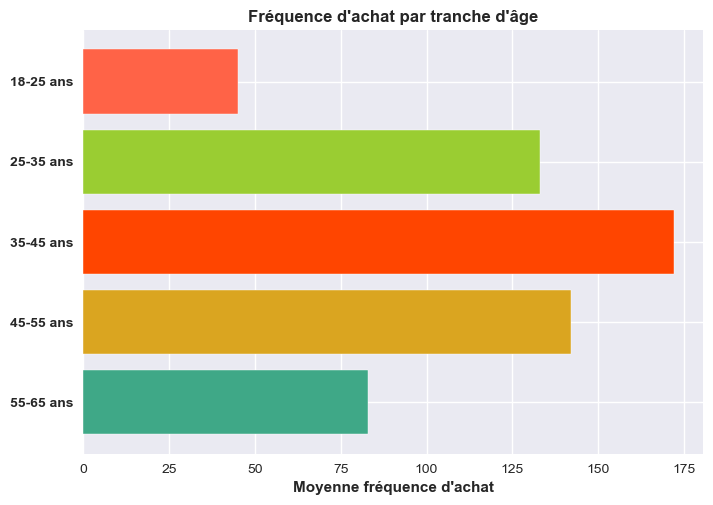

In [195]:
fig, ax = plt.subplots()

age = ('18-25 ans', '25-35 ans','35-45 ans','45-55 ans','55-65 ans')
y_pos = np.arange(len(age))
freq = moyenne_freq_achat['frequence_achat']

ax.barh(y_pos, freq, color=('#ff6347','#9acd32','#ff4500','#daa520','#3fa887'))
ax.set_yticks(y_pos, labels=age,fontweight='bold')
ax.invert_yaxis()  
ax.set_xlabel("Moyenne fréquence d'achat",fontweight='bold')
ax.set_title("Fréquence d'achat par tranche d'âge",fontweight='bold')

plt.show()

### <span style="color : #8b008b"> <u>5.4 - Lien entre l'âge des clients et la taille du panier moyen </u></span>

In [196]:
pan_moy = data_particulier.groupby('client_id')[['price']].sum()
print(round(pan_moy.mean(),2))

price    1242.5
dtype: float64


###### Le panier moyen par client est de 1242,50 €

In [197]:
data_particulier=data_particulier.join(pan_moy, on='client_id', rsuffix='_panier_moyen')
data_particulier

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois,age,frequence_achat,tranche_age,price_panier_moyen
0,0_1421,19.99,0,2022-02-20,s_168213,c_6389,f,1991,2022-02,32,229,"(25, 35]",2990.67
1,0_1421,19.99,0,2022-10-20,s_285450,c_6389,f,1991,2022-10,32,229,"(25, 35]",2990.67
3,0_1635,16.99,0,2021-04-28,s_26841,c_6389,f,1991,2021-04,32,229,"(25, 35]",2990.67
4,0_166,1.83,0,2021-07-15,s_62585,c_6389,f,1991,2021-07,32,229,"(25, 35]",2990.67
5,0_166,1.83,0,2022-10-15,s_282822,c_6389,f,1991,2022-10,32,229,"(25, 35]",2990.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,2_163,68.99,2,2022-01-28,s_156517,c_7739,m,1997,2022-01,26,3,"(25, 35]",206.97
679328,2_101,63.99,2,2021-07-21,s_65192,c_7089,m,2002,2021-07,21,4,"(18, 25]",255.96
679329,2_101,63.99,2,2022-12-21,s_315267,c_7089,m,2002,2022-12,21,4,"(18, 25]",255.96
679330,2_101,63.99,2,2022-10-21,s_285788,c_7089,m,2002,2022-10,21,4,"(18, 25]",255.96


In [198]:
data_particulier=data_particulier.rename(columns={'price_panier_moyen':'panier_moyen'})
data_particulier

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois,age,frequence_achat,tranche_age,panier_moyen
0,0_1421,19.99,0,2022-02-20,s_168213,c_6389,f,1991,2022-02,32,229,"(25, 35]",2990.67
1,0_1421,19.99,0,2022-10-20,s_285450,c_6389,f,1991,2022-10,32,229,"(25, 35]",2990.67
3,0_1635,16.99,0,2021-04-28,s_26841,c_6389,f,1991,2021-04,32,229,"(25, 35]",2990.67
4,0_166,1.83,0,2021-07-15,s_62585,c_6389,f,1991,2021-07,32,229,"(25, 35]",2990.67
5,0_166,1.83,0,2022-10-15,s_282822,c_6389,f,1991,2022-10,32,229,"(25, 35]",2990.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,2_163,68.99,2,2022-01-28,s_156517,c_7739,m,1997,2022-01,26,3,"(25, 35]",206.97
679328,2_101,63.99,2,2021-07-21,s_65192,c_7089,m,2002,2021-07,21,4,"(18, 25]",255.96
679329,2_101,63.99,2,2022-12-21,s_315267,c_7089,m,2002,2022-12,21,4,"(18, 25]",255.96
679330,2_101,63.99,2,2022-10-21,s_285788,c_7089,m,2002,2022-10,21,4,"(18, 25]",255.96


#### Panier moyen par tranches d'âge

In [199]:
panier_age = data_particulier.groupby(data_particulier['tranche_age'])
moyenne_panier = panier_age['panier_moyen'].mean().astype(int)
print(moyenne_panier)

tranche_age
(18, 25]    1794
(25, 35]    2113
(35, 45]    2275
(45, 55]    1960
(55, 65]    1422
Name: panier_moyen, dtype: int32


#### Tester la normalité des variables 

In [200]:
sps.normaltest(data_particulier['panier_moyen'])

NormaltestResult(statistic=34368.988709187164, pvalue=0.0)

###### p-value = 0.0 < 0,05. La variable ne suit pas une loi normale. Il en est de même pour la variable "âge" (test effectué lors de la fréquence d'achat).

###### Effectuer un test non paramétrique 

#### Test de spearman

In [201]:
correl3, p_val3 = stats.spearmanr(data_particulier['age'], data_particulier['panier_moyen'])


print("Coefficient de corrélation :", correl3)
print("p-value : {:.3f}".format(p_val3))

Coefficient de corrélation : -0.20232667163127319
p-value : 0.000


###### Le coefficient de corrélation est très proche de 0 donc il y a une très faible corrélation entre l'âge des clients et la taille du panier moyen. Cependant, il y a un lien entre ces deux variables car la p-value est inférieur à 0,05.

#### Représentation graphique de la taille du panier moyen par tranches d'âge 

In [202]:
moyenne_panier=moyenne_panier.reset_index()
moyenne_panier

,tranche_age,panier_moyen
0,"(18, 25]",1794
1,"(25, 35]",2113
2,"(35, 45]",2275
3,"(45, 55]",1960
4,"(55, 65]",1422


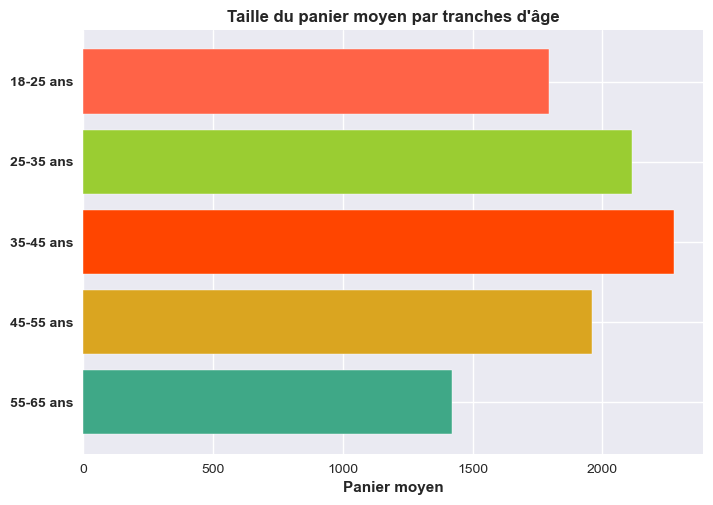

In [203]:
fig, ax = plt.subplots()

age = ('18-25 ans', '25-35 ans','35-45 ans','45-55 ans','55-65 ans')
y_pos = np.arange(len(age))
panier = moyenne_panier['panier_moyen']

ax.barh(y_pos, panier, color=('#ff6347','#9acd32','#ff4500','#daa520','#3fa887'))
ax.set_yticks(y_pos, labels=age,fontweight='bold')
ax.invert_yaxis()  
ax.set_xlabel("Panier moyen",fontweight='bold')
ax.set_title("Taille du panier moyen par tranches d'âge",fontweight='bold')

plt.show()

### <span style="color : #556b2f"> <u>5.5 - Lien entre l'âge des clients et les catégories de livres achetés </u></span>

In [204]:
data_particulier

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois,age,frequence_achat,tranche_age,panier_moyen
0,0_1421,19.99,0,2022-02-20,s_168213,c_6389,f,1991,2022-02,32,229,"(25, 35]",2990.67
1,0_1421,19.99,0,2022-10-20,s_285450,c_6389,f,1991,2022-10,32,229,"(25, 35]",2990.67
3,0_1635,16.99,0,2021-04-28,s_26841,c_6389,f,1991,2021-04,32,229,"(25, 35]",2990.67
4,0_166,1.83,0,2021-07-15,s_62585,c_6389,f,1991,2021-07,32,229,"(25, 35]",2990.67
5,0_166,1.83,0,2022-10-15,s_282822,c_6389,f,1991,2022-10,32,229,"(25, 35]",2990.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,2_163,68.99,2,2022-01-28,s_156517,c_7739,m,1997,2022-01,26,3,"(25, 35]",206.97
679328,2_101,63.99,2,2021-07-21,s_65192,c_7089,m,2002,2021-07,21,4,"(18, 25]",255.96
679329,2_101,63.99,2,2022-12-21,s_315267,c_7089,m,2002,2022-12,21,4,"(18, 25]",255.96
679330,2_101,63.99,2,2022-10-21,s_285788,c_7089,m,2002,2022-10,21,4,"(18, 25]",255.96


#### Réaliser un test ANOVA pour tester la dépendance entre l'âge des clients et les catégories de livres achetés

In [205]:
statistique, p_value = f_oneway(data_particulier['categ'], data_particulier['age'])


print("Statistique de test : ", statistique)
print("p-value : {:.3f}".format(p_value))

Statistique de test :  6365612.488623628
p-value : 0.000


###### p-value < 0,05. Cela indique qu'il y a un lien entre l'âge des clients et la catégorie de livres achetés.

#### Représentation graphique des catégories de livres achetés par tranches d'âge

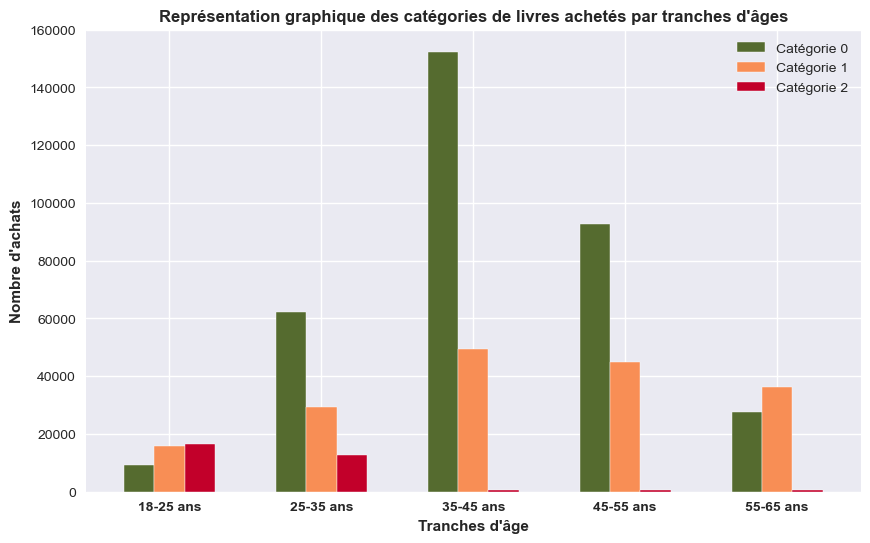

In [206]:
ax = data_particulier.groupby(['tranche_age','categ'])['categ'].count().unstack().plot(kind='bar', width=0.6, figsize=(10,6),color=('#556b2f','#f88e55','#c2002a'))

ax.set_xticklabels(labels=['18-25 ans', '25-35 ans', '35-45 ans', '45-55 ans', '55-65 ans'],fontweight='bold',rotation=0)
plt.xlabel("Tranches d'âge",fontweight='bold') 
plt.ylabel("Nombre d'achats",fontweight='bold') 
plt.legend(['Catégorie 0', 'Catégorie 1', 'Catégorie 2'], fontsize='small')
ax.set_title("Représentation graphique des catégories de livres achetés par tranches d'âges",fontweight='bold')
plt.show()

###### Tous ces tests ont permis de démontrer que les livres ne sont pas achetés au hasard par les clients. Leurs achats dépendent de leur genre mais aussi de leur âge.